#COMISION 25262 - DATA ANALYTICS

>  ## ETAPA:  *"Entrega Final Proyecto"*.
   **Alumno**: Javier Marcelo Espiñeira (DNI 23.146.908).



## Guía para el lector / evaluador. (Sobre enunciado original propuesto)
*   **Sección 1:** Recopilación y Preparación de Datos (Clases 1 a 4)
    *   ***Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.*
    *   **Actividades realizadas:**

        1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.<br>
        👉 Ir a *"C) Carga de los datos de entrada como DataFrames."* usando el índice lateral.

        2. Realizar un script básico que calcule las ventas mensuales utilizando variables y operadores.<br>
        👉 Punto ELIMINADO del temario.

        3. Estructuras de Datos: Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.<br>
        👉 Punto ELIMINADO del temario.

        4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.<br>
        👉 Ir a *"D) Exploración inicial de los datos."* usando el índice lateral.

        5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.<br>
        👉 Ir a *"F) Detección y tratamiento de valores nulos"., G) Detección y tratamiento de duplicados. y H)a) Copia / reserva de los DataFrames originales.* usando el índice lateral.
         <br>

*   **Sección 2:** Pre procesamiento y Limpieza de Datos (Clases 5 a 8)

    *   ***Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.*

    *   **Actividades realizadas:**

        1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.<br>
        👉 Ir a *"H) Limpieza y transformación de los DataFrames"* usando el índice lateral.

        2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.<br>
        👉 Ir a *"I) Enriquesimiento de datos, Anexo Especial a)"* usando el índice lateral.

        3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.<br>
        👉 Ir a *"I) Enriquesimiento de datos, Anexo Especial b)"* usando el índice lateral.

        4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.<br>
        👉 Ir a "J) Integración de datos los DataFrames, sección b)"
         <br>


*   **Sección 3:** Análisis de Datos

    *   ***Objetivo:** Realizar análisis estadístico y exploratorio sobre los datos procesados.*

    *   **Actividades realizadas:**

        1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.<br>
        👉 Ir a *"D), E) y principalmente K) Exploración y análisis gráfico/estadístico final de los datos."* usando el índice lateral.

        2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.<br>
        👉 Ir a *" K) Exploración y análisis gráfico/estadístico final de los datos."* usando el índice lateral.

        3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.<br>
        👉 Ir a *" K) Exploración y análisis gráfico/estadístico final de los datos.", punto c)* usando el índice lateral.

        4. Consolidación de Datos: Consolidar todos los análisis previos y preparar un conjunto de datos final que resuma los hallazgos clave para la presentación.<br>
        👉 Ir a *"L) Conversion final de los DataFrame modificados a CSV."* usando el índice lateral.       
        <br>

*   **Sección 4:** Visualización de Datos

    *   ***Objetivo:** Aprender a visualizar datos de manera efectiva utilizando diversas bibliotecas.*

    *   **Actividades realizadas:**

        1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión) que representen las ventas con diferentes periodos de tiempo.<br>
        👉 Ir a *"K) Exploración y análisis gráfico/estadístico final de los datos."* usando el índice lateral."* usando el índice lateral.

        2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.<br>
        👉 Ir a *"K) Exploración y análisis gráfico/estadístico final de los datos."* usando el índice lateral."* usando el índice lateral.

        3. Visualización Interactiva con Plotly: Construir un dashboard interactivo que combine múltiples visualizaciones, permitiendo al usuario explorar los datos dinámicamente.<br>
        👉 Ir a *"K) Exploración y análisis gráfico/estadístico final de los datos."* usando el índice lateral."* usando el índice lateral.

        4. Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto. Presentar ante un panel simulado de "expertos" en SynthData, recibiendo feedback sobre el trabajo realizado.<br>
        👉 Ir a *"M) Resumen conclusiones finales."* usando el índice lateral.
<br>

*   **Anexo:**

    *   ***Objetivo:** Descripción y links a todos los archivos adicionales.*

    *    Descripciones de archivos y versiones.<br>
      👉 Ir a *"N) ANEXO Nombre de Archivos y versionado utilizado."* usando el índice lateral.
  <br>




# A) Preparación del entorno y carga de librerías utilizadas.

In [2]:
# Importar la librerías
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import folium # En local VSC se debe permitir conexión para visualizar los mapas. (en colab no)
# import re

# B) Funciones utilizadas.
>Se mantienen por separado las funciones utilizadas tanto para su futura reutilización, testeo y mantenimiento como para diferenciar la logica de funcionamiento interno de cada función con el proposito que esta cumple en el proceso que se está realizando con los datos.
>Si bien no se detectaron errores para lo realizado en este caso en particular, mi idea es a futuro agregar testeo para mejorar la confianza en las mismas y ganar confiabilidad en explorar la mayoría de los caminos y ocurrencias posibles. (de hecho se observaron problemas principalmente en los mensajes personalizados de error al parecer entiendo por manejo de errores la plataforma Colab -en Python puro funcionan y aquí, no por ejemplo, pero se dejó para más adelante estos temas que exceden el trabajo solicitado)  

In [3]:
# Funciones de Uso General

# IMPORTANTE: siempre que se pase como argumento un DataFrame de Pandas, hacerlo
# en primer lugar lo que permite el uso de la funcion con el metodo "pipe".
# Ejemplo de uso con "pipe":  df.pipe(funcion_sin_comillas, arg2, arg3 ...)

def generar_url_csv_gdrive(ID_planilla):
  """
  Genera una URL de CSV en Google Drive a partir de un ID de hoja.(Solo compartido o accesible para todos con enlace)

  Args:
    sheet_id: El ID del documento de Google Drive.

  Returns:
    La URL de exportación CSV para ser utilizada en pandas ".read_csv"
  """
  url = f'https://drive.google.com/uc?export=download&id={ID_planilla}'
  return url


def realizar_exploracion_inicial_ejemplo_visual(DF, nombre="", cantidad_lineas=5):
  """
  Realiza una exploración inicial visual de un DataFrame, mostrando las primeras, últimas y filas de ejemplo.

  Args:
    DF: El DataFrame a explorar.
    nombre: Un nombre para el DataFrame (opcional).
    cantidad_lineas: La cantidad de líneas a mostrar en head, tail y sample (opcional).
  """
  if DF is None:
    print(f"Error: El DataFrame '{nombre}' no ha sido definido o es None.")
    return

  print(f"\n\n '{nombre}' Primeras filas:\n")
  print(DF.head(cantidad_lineas))
  print(f"\n\n '{nombre}' Filas de ejemplo -al azar-:\n")
  print(DF.sample(cantidad_lineas))
  print(f"\n\n '{nombre}' Últimas filas:\n")
  print(DF.tail(cantidad_lineas))


def realizar_exploracion_inicial_profunda(DF, nombre=""):
  """
  Realiza una exploración inicial profunda de un DataFrame, Analizando su forma,
  tamaño caracteristicas de sus datos e información estadística de los mismos.

  Args:
    DF: El DataFrame a explorar.
    nombre: Un nombre para el DataFrame (opcional).
  """
  if DF is None:
    print(f"Error: El DataFrame '{nombre}' no ha sido definido o es None.")
    return

  print(f"\n\n '{nombre}' Analisis de Tamaño: (Filas, Columnas)\n")
  dimensiones = DF.shape
  print(dimensiones)
  print(f"\n\n '{nombre}' Tipos de Datos, Nulos, etc.:\n")
  print(DF.info())
  print(f"\n\n '{nombre}' Informacion Estadistica del set:\n")
  print(DF.describe(include= "all"))


def contar_nulos_por_columna(DF, nombre=""):
  """
  Cuenta y muestra la cantidad de valores nulos por columna en un DataFrame.

  Args:
    DF: El DataFrame a analizar.
    nombre: Un nombre para el DataFrame (opcional)
  """
  if DF is None:
    print("Error: El DataFrame no ha sido definido o es None.")
    return

  print(f"\nConteo de valores nulos por columna del dataframe '{nombre}':\n")
  for columna in DF.columns:
    nulos = DF[columna].isnull().sum()
    print(f"Columna '{columna}': {nulos} valores nulos")


def mostrar_nulos_de_una_columna(DF, columna, nombre=""):
  """
  Muestra las filas de un DataFrame con valores nulos en una columna específica.

  Args:
    DF: El DataFrame a analizar.
    columna: El nombre de la columna a verificar en busca de nulos.
    nombre: Un nombre para el DataFrame (opcional)
  """
  if DF is None:
    print("Error: El DataFrame no ha sido definido o es None.")
    return

  if columna not in DF.columns:
    print(f"Error: La columna '{columna}' no existe en el DataFrame '{nombre}'.")
    return

  df_filas_con_nulos = DF[DF[columna].isnull()]
  print(f"\nFilas con valores nulos en la columna '{columna}' del dataframe '{nombre}':\n")
  print(df_filas_con_nulos.head(len(df_filas_con_nulos)))


def detectar_duplicados(DF, nombre="", columnas_pk=None):
  """
  Detecta y muestra las filas duplicadas en un DataFrame.

  Args:
    DF: El DataFrame a analizar.
    nombre: Un nombre para el DataFrame (opcional)
    columnas_pk: Lista de columnas a considerar como clave primaria (opcional)
  """
  if DF is None:
    print("Error: El DataFrame no ha sido definido o es None.")
    return

  if columnas_pk:
    print(f"\nConteo de valores duplicados en el dataframe '{nombre}' por {columnas_pk}:\n")
    duplicados = DF.duplicated(subset=columnas_pk).sum()
    print(f"Cantidad de filas duplicadas: {duplicados}")

    if duplicados > 0:
      print(f"\nFilas duplicadas en el dataframe '{nombre}' por {columnas_pk}:\n")
      duplicated_rows = DF[DF.duplicated(subset=columnas_pk, keep=False)]
      display(duplicated_rows.groupby(columnas_pk).size().reset_index(name='cantidad_duplicados'))

  else:
    print(f"\nConteo de valores duplicados en el dataframe '{nombre}':\n")
    duplicados = DF.duplicated().sum()
    print(f"Cantidad de filas duplicadas: {duplicados}")

    if duplicados > 0:
      print(f"\nFilas duplicadas en el dataframe '{nombre}':\n")
      display(DF[DF.duplicated()])


def eliminar_duplicados(DF, nombre="", columnas_pk=None, tipo_de_eliminacion='first'):
  """
  Elimina las filas duplicadas de un DataFrame.

  Args:
    DF: El DataFrame del que se eliminarán los duplicados.
    nombre: Un nombre para el DataFrame (opcional)
    columnas_pk: Lista de columnas a considerar como clave primaria (opcional).
                 Si es None, se consideran todas las columnas.
    tipo_de_eliminacion: Determina qué duplicados eliminar. 'first' elimina todos excepto la primera aparición,
                         'last' elimina todos excepto la última, False elimina todos los duplicados. (opcional, por defecto 'first')

  Returns:
    El DataFrame sin duplicados.
  """
  if DF is None:
    print("Error: El DataFrame no ha sido definido o es None.")
    return None

  filas_al_inicio = DF.shape[0]

  if columnas_pk:
    df_modificado = DF.drop_duplicates(subset=columnas_pk, keep=tipo_de_eliminacion)
    print(f"\nDuplicados eliminados del dataframe '{nombre}' por {columnas_pk}:")
  else:
    df_modificado = DF.drop_duplicates(keep=tipo_de_eliminacion)
    print(f"\nDuplicados eliminados del dataframe '{nombre}':")

  filas_eliminadas = filas_al_inicio - df_modificado.shape[0]
  print(f"Cantidad de filas eliminadas: {filas_eliminadas}")

  return df_modificado


def intervenir_nulos_de_una_columna(DF, columna, tipo_operacion, valor_personalizado=None, nombre=""):
  """
  Interviene en los valores nulos de una columna específica de un DataFrame
  basado en el tipo de operación especificada.

  Args:
    DF: El DataFrame a modificar.
    columna: El nombre de la columna donde se intervendrán los nulos.
    tipo_operacion: El tipo de operación a realizar. Puede ser 'eliminar',
                    'media', 'moda', 'mediana', o 'personalizado'.
    valor_personalizado: El valor a utilizar si tipo_operacion es 'personalizado'.
                       (Opcional, por defecto "")
    nombre: Un nombre para el DataFrame (opcional)

  Returns:
    El DataFrame modificado.
  """
  if DF is None:
    print("Error: El DataFrame no ha sido definido o es None.")
    return None

  if columna not in DF.columns:
    print(f"Error: La columna '{columna}' no existe en el DataFrame.")
    return DF

  df_modificado = DF.copy()
  nulos_iniciales = df_modificado[columna].isnull().sum()

  if nulos_iniciales == 0:
    print(f"No hay valores nulos en la columna '{columna}' del dataframe '{nombre}'.")
    return df_modificado

  print(f"\nInterviniendo valores nulos en la columna '{columna}' del dataframe '{nombre}' con operación '{tipo_operacion}':")

  if tipo_operacion == 'eliminar':
    df_modificado = df_modificado.dropna(subset=[columna])
    print(f"Se eliminaron las filas con valores nulos en la columna '{columna}'.")
  elif tipo_operacion == 'media':
    try:
      media = df_modificado[columna].mean()
      df_modificado[columna] = df_modificado[columna].fillna(media)
      print(f"Los valores nulos en la columna '{columna}' fueron reemplazados por la media ({media}).")
    except TypeError:
      print(f"Error: La columna '{columna}' no es numérica, no se puede calcular la media.")
  elif tipo_operacion == 'moda':
    try:
      moda = df_modificado[columna].mode()[0]
      df_modificado[columna] = df_modificado[columna].fillna(moda)
      print(f"Los valores nulos en la columna '{columna}' fueron reemplazados por la moda ({moda}).")
    except Exception as e:
        print(f"Error al calcular la moda para la columna '{columna}': {e}")
  elif tipo_operacion == 'mediana':
    try:
      mediana = df_modificado[columna].median()
      df_modificado[columna] = df_modificado[columna].fillna(mediana)
      print(f"Los valores nulos en la columna '{columna}' fueron reemplazados por la mediana ({mediana}).")
    except TypeError:
      print(f"Error: La columna '{columna}' no es numérica, no se puede calcular la mediana.")
  elif tipo_operacion == 'personalizado':
    if valor_personalizado is not None:
      df_modificado[columna] = df_modificado[columna].fillna(valor_personalizado)
      print(f"Los valores nulos en la columna '{columna}' fueron reemplazados por el valor personalizado ({valor_personalizado}).")
    else:
      print("Error: Se especificó 'personalizado' pero no se proporcionó 'valor_personalizado'.")
  else:
    print(f"Error: Tipo de operación '{tipo_operacion}' no reconocido.")

  nulos_finales = df_modificado[columna].isnull().sum()
  filas_afectadas = nulos_iniciales - nulos_finales
  print(f"Cantidad de valores nulos antes: {nulos_iniciales}, después: {nulos_finales}. Filas afectadas: {filas_afectadas}")


  return df_modificado


def normalizar_texto(DF, columnas, nombre="", eliminar_espacios_extra=True, eliminar_caracteres_especiales=True, tipo_conversion=None, mapeo_caracteres_especiales=None):
  """
  Normaliza el texto en columnas específicas de un DataFrame.

  Args:
    DF: El DataFrame a modificar.
    columnas: Una lista de nombres de columnas a normalizar.
    nombre: Un nombre para el DataFrame (opcional).
    eliminar_espacios_extra: Booleano, si True elimina espacios en blanco adicionales (inicio, fin, y multiples intermedios).
    eliminar_caracteres_especiales: Booleano, si True elimina caracteres especiales definidos.
    tipo_conversion: Cadena, puede ser 'title', 'lower', 'upper', o None para no cambiar el caso.
    mapeo_caracteres_especiales: Diccionario opcional para mapear caracteres especiales a reemplazos.
                      Por defecto, mapea '\u200b\t\r\n' a '' y 'ñ' a 'nh', vocales acentuadas a sin acentuar, y apostrofes a ''.

  Returns:
    El DataFrame modificado con el texto normalizado en las columnas especificadas.
  """
  if DF is None:
    print("Error: El DataFrame no ha sido definido o es None.")
    return None

  df_modificado = DF.copy()

  if mapeo_caracteres_especiales is None:
      mapeo_caracteres_especiales = {
          'ñ': 'nh', 'Ñ': 'Nh',
          'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u',
          'Á': 'A', 'É': 'E', 'Í': 'I', 'Ó': 'O', 'Ú': 'U',
          "'": "" # para quitar apostrofes simples intermedios
          }


  for columna in columnas:
    if columna not in df_modificado.columns:
      print(f"Advertencia: La columna '{columna}' no existe en el DataFrame '{nombre}'. Se omite.")
      continue

    # Convertir a string
    df_modificado[columna] = df_modificado[columna].astype(str)

    # Eliminar espacios en blanco adicionales, tabulaciones, saltos de página, etc.
    if eliminar_espacios_extra:
      df_modificado[columna] = df_modificado[columna].str.strip().str.replace(r'\s+', ' ', regex=True).replace(r"[\u200b\t\r\n]", "", regex=True)


    # Eliminar caracteres especiales
    if eliminar_caracteres_especiales:
        for char, replacement in mapeo_caracteres_especiales.items():
            df_modificado[columna] = df_modificado[columna].str.replace(char, replacement, regex=False)


    # Convertir caso
    if tipo_conversion == 'title':
      df_modificado[columna] = df_modificado[columna].str.title()
    elif tipo_conversion == 'lower':
      df_modificado[columna] = df_modificado[columna].str.lower()
    elif tipo_conversion == 'upper':
      df_modificado[columna] = df_modificado[columna].str.upper()
    elif tipo_conversion is not None:
        print(f"Advertencia: Valor no válido para 'convertir_caso' en la columna '{columna}'. Debe ser 'title', 'lower', 'upper', o None.")
  print(f"\n Normalización de texto aplicada a las columnas {columnas} del dataframe '{nombre}'.")
  return df_modificado


def convertir_formato_fecha(DF, columnas, nombre="", formato_original="%d/%m/%Y"):
    """
    Convierte las columnas de fecha de un DataFrame a tipo datetime64.

    Args:
      DF: El DataFrame a modificar.
      columnas: Una lista de nombres de columnas con tipo de datos de fecha a intervenir.
      nombre: Un nombre para el DataFrame (opcional).
      formato_original: El formato actual de las fechas en las columnas (por defecto "%d/%m/%Y").

    Returns:
      El DataFrame modificado con las columnas de fecha convertidas.
    """
    if DF is None:
        print("Error: El DataFrame no ha sido definido o es None.")
        return None

    df_modificado = DF.copy()

    print(f"\nConvirtiendo formato de fecha y tipo de datos a datetime64 en el dataframe '{nombre}':")

    for columna in columnas:
        if columna not in df_modificado.columns:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame '{nombre}'. Se omite.")
            continue

        try:
            # Convertir a datetime con el formato original
            df_modificado[columna] = pd.to_datetime(df_modificado[columna], format=formato_original, errors='coerce')

            print(f"Columna '{columna}' convertida a datetime64.")

        except ValueError as e:
            print(f"Error al convertir la columna '{columna}': {e}")
            print(f"Asegúrese de que el formato original '{formato_original}' coincide con los datos.")
        except Exception as e:
            print(f"Ocurrió un error inesperado al procesar la columna '{columna}': {e}")

    print(f"\n Conversión de formato de fecha y tipo de datos completada para las columnas {columnas} del dataframe '{nombre}'.")

    return df_modificado


def convertir_formato_numerico(DF, columnas, nombre="", caracteres_a_eliminar=None, tipo_numerico='float64'):
    """
    Convierte columnas de un DataFrame con datos numéricos en formato de texto a tipo numérico.

    Args:
      DF: El DataFrame a modificar.
      columnas: Una lista de nombres de columnas a convertir.
      nombre: Un nombre para el DataFrame (opcional).
      caracteres_a_eliminar: Lista de caracteres a eliminar antes de la conversión (por defecto None).
                             Si es None, elimina '$', ',', y espacios en blanco.
      tipo_numerico: El tipo numérico deseado ('int64' o 'float64', por defecto 'float64').

    Returns:
      El DataFrame modificado con las columnas convertidas a tipo numérico.
    """
    if DF is None:
        print("Error: El DataFrame no ha sido definido o es None.")
        return None

    df_modificado = DF.copy()

    if caracteres_a_eliminar is None:
      caracteres_a_eliminar = ['$', ',', ' '] # Caracteres comunes a eliminar

    print(f"\nConvirtiendo columnas a formato numérico en el dataframe '{nombre}':")

    for columna in columnas:
        if columna not in df_modificado.columns:
            print(f"Advertencia: La columna '{columna}' no existe en el DataFrame '{nombre}'. Se omite.")
            continue

        try:
            # Convertir a string para asegurar que se puedan aplicar los métodos de cadena
            df_modificado[columna] = df_modificado[columna].astype(str)

            # Eliminar caracteres no deseados
            for char in caracteres_a_eliminar:
                df_modificado[columna] = df_modificado[columna].str.replace(char, '', regex=False)

            # Manejar el separador decimal si no es un punto (ej. coma)
            # Este ejemplo asume que después de eliminar miles y símbolos,
            # el único separador decimal potencial que queda es una coma si no es punto.
            # Si tus datos tienen otros separadores decimales, ajusta aquí.
            df_modificado[columna] = df_modificado[columna].str.replace(',', '.', regex=False)


            # Convertir a tipo numérico
            if tipo_numerico == 'float64':
                df_modificado[columna] = pd.to_numeric(df_modificado[columna], errors='coerce')
            elif tipo_numerico == 'int64':
                # Para convertir a int, primero convertimos a float para manejar decimales
                # y luego a int. Los valores que no se puedan convertir a float o que
                # tengan decimales después de la limpieza y deban ser int resultarán en NaN/NaT si hay errores='coerce'.
                df_modificado[columna] = pd.to_numeric(df_modificado[columna], errors='coerce').astype('int64', errors='ignore')
            else:
                print(f"Advertencia: Tipo numérico '{tipo_numerico}' no reconocido para la columna '{columna}'.")
                continue


            print(f"Columna '{columna}' convertida a tipo '{tipo_numerico}'.")

        except Exception as e:
            print(f"Ocurrió un error inesperado al procesar la columna '{columna}': {e}")

    print(f"\nConversión a formato numérico completada para las columnas {columnas} del dataframe '{nombre}'.")

    return df_modificado


def reporte_calidad_global(DFs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      DFs: lista de DataFrames
      nombres: lista de nombres correspondientes a los DataFrames
    ADVERTENCIA: son pares ordenados los DFs y nombres. Deben tener igual orden y cantidad de elementos.

    Retorna:
      muestra un reporte de calidad de los DataFrames solo en pantalla.
    """
    resumen = []
    for df, nombre in zip(DFs, nombres):
        nulos = df.isna().sum().sum()                             # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()              # Total de filas duplicadas
        columnas = len(df.columns)                                # Cantidad de columnas
        filas = len(df)                                           # Cantidad de registros
        memoria = df.memory_usage(deep=True).sum() / 1024 / 1024  # Tamaño en MB

        resumen.append({
            "DataFrame": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
            "Memoria": memoria
        })

    reporte = pd.DataFrame(resumen)
    display(reporte)


def categorizar_por_cuantiles(DF, columna, nombre_columna_nueva, nombre="", num_cuantiles=4, etiquetas=None,
                              usa_iqr=False, iqr_multiplicador=1.5, incluir_nan_categoria=True):
    """
    Categoriza una columna numérica en cuantiles, opcionalmente separando outliers por IQR.
    Args:
      DF: DataFrame
      columna: nombre de la columna numérica
      nombre_columna_nueva: nombre para la nueva columna categórica
      nombre: nombre del DF (solo para mensajes)
      num_cuantiles: número de cuantiles para la porción 'no-outlier'
      etiquetas: lista de etiquetas para los cuantiles (longitud=num_cuantiles). Si None, genera etiquetas automáticas.
      usa_iqr: si True, separa 'valor atipico inferior' y 'valor atipico superior' antes de cuantiles
      iqr_multiplicador: multiplicador de la IQR para definir límites (1.5 por defecto)
      incluir_nan_categoria: si True, asigna categoría explícita a NaNs (p. ej. 'NO_NUMERICO')
    Returns:
      DF con la nueva columna añadida (o modificado in-place).
    """
    if DF is None:
        print(f"Error: DataFrame '{nombre}' es None.")
        return DF
    if columna not in DF.columns:
        print(f"Error: columna '{columna}' no existe en '{nombre}'.")
        return DF
    if not pd.api.types.is_numeric_dtype(DF[columna]):
        print(f"Error: columna '{columna}' no es numérica en '{nombre}'.")
        return DF

    s = DF[columna] # Renombro con s de Serie para acotar la escritura en el codigo suscesivo
    # Preparar etiquetas por defecto
    if etiquetas is None:
        etiquetas = [f"Q{i+1}" for i in range(num_cuantiles)]

    # INICIALIZAR columna nueva con NaN
    DF = DF.copy()
    DF[nombre_columna_nueva] = pd.NA

    # Opcional: asignar NaN explícito
    if incluir_nan_categoria:
        caso_nan = s.isna()
    else:
        caso_nan = pd.Series(False, index=s.index)

    if usa_iqr:
        q1 = s.dropna().quantile(0.25)
        q3 = s.dropna().quantile(0.75)
        iqr = q3 - q1
        # límites correctos: bajo = Q1 - k*IQR, alto = Q3 + k*IQR
        bajo = q1 - iqr_multiplicador * iqr
        alto = q3 + iqr_multiplicador * iqr

        caso_bajo = s < bajo
        caso_alto = s > alto
        caso_analisis = (~caso_bajo) & (~caso_alto) & (~caso_nan)

        DF.loc[caso_bajo, nombre_columna_nueva] = "VALOR_ATIPICO_INFERIOR"
        DF.loc[caso_alto, nombre_columna_nueva] = "VALOR_ATIPICO_SUPERIOR"

        # Ahora cuantiles sobre los valores 'middle'
        valores_analisis = s[caso_analisis]

        # Si no hay suficientes valores para qcut, fallback a pd.cut por percentiles manuales
        try:
            categorias = pd.qcut(valores_analisis, q=num_cuantiles, labels=etiquetas, duplicates='drop')
            # asignar usando el índice de los valores analizados para evitar desalineación
            DF.loc[valores_analisis.index, nombre_columna_nueva] = categorias.astype(object)
        except ValueError:
            # Ejemplo: demasiados valores iguales; crear cuantiles por rank
            ranks = valores_analisis.rank(method='first', pct=True)
            bins = pd.cut(ranks, bins=num_cuantiles, labels=etiquetas)
            DF.loc[valores_analisis.index, nombre_columna_nueva] = bins.astype(object)
    else:
        # Simple qcut global
        try:
            categorias = pd.qcut(s, q=num_cuantiles, labels=etiquetas, duplicates='drop')
            DF.loc[s.index, nombre_columna_nueva] = categorias.astype(object)
        except ValueError:
            # Fallback si qcut falla (p.ej. todos los valores iguales)
            ranks = s.rank(method='first', pct=True)
            DF.loc[s.index, nombre_columna_nueva] = pd.cut(ranks, bins=num_cuantiles, labels=etiquetas).astype(object)

    # Asignar categoría para NaN si se pidió
    if incluir_nan_categoria:
        DF.loc[caso_nan, nombre_columna_nueva] = "NO_NUMERICO"

    return DF


def sumar_por_categoria(DF, columna_categoria, columna_dato, nombre=""):
  """
  Calcula la suma de una columna numérica agrupada por una o varias columnas categóricas.

  Args:
    DF: El DataFrame a analizar.
    columna_categoria: El nombre de la columna categórica o una lista de nombres de columnas para agrupar.
    columna_dato: El nombre de la columna numérica a sumar.
    nombre: Un nombre para el DataFrame (opcional).

  Returns:
    Un DataFrame con la suma de la columna_dato por cada categoría en columna_categoria.
  """
  if DF is None:
    print(f"Error: El DataFrame '{nombre}' no ha sido definido o es None.")
    return None

  # Ensure columna_categoria is a list
  if not isinstance(columna_categoria, list):
      columna_categoria = [columna_categoria]

  for col in columna_categoria:
      if col not in DF.columns:
          print(f"Error: La columna de categoría '{col}' no existe en el DataFrame '{nombre}'.")
          return DF

  if columna_dato not in DF.columns:
    print(f"Error: La columna de datos '{columna_dato}' no existe en el DataFrame '{nombre}'.")
    return DF

  if not pd.api.types.is_numeric_dtype(DF[columna_dato]):
      print(f"Error: La columna de datos '{columna_dato}' no es de tipo numérico en el DataFrame '{nombre}'.")
      return DF

  print(f"\nCalculando la suma de '{columna_dato}' agrupada por {columna_categoria} en el dataframe '{nombre}':")

  df_resultado = DF.groupby(
      by=columna_categoria,
      dropna=False,
      as_index=False,
      observed=False
  )[columna_dato].sum()

  # Rename the column after resetting the index
  df_resultado = df_resultado.rename(columns={columna_dato: f'suma_{columna_dato}'})

  return df_resultado

def filtrar_dataframe(DF, columna_objetivo, valor_objetivo, accion="pantalla", nombre=""):
  """
  Filtra un DataFrame basado en valores específicos en una o varias columnas.

  Args:
    DF: El DataFrame a filtrar.
    columna_objetivo: El nombre de la columna o una lista de nombres de columnas para filtrar.
    valor_objetivo: El valor o una lista de valores para filtrar. Si se proporciona una lista
                    de columnas, debe ser una lista de listas o una lista de valores únicos
                    para cada columna correspondiente.
    accion: Especifica la acción a realizar. 'pantalla' para mostrar el resultado,
            'nuevo_df' para retornar un nuevo DataFrame. (opcional, por defecto 'pantalla')
    nombre: Un nombre para el DataFrame (opcional).

  Returns:
    Si accion es 'nuevo_df', retorna el DataFrame filtrado. De lo contrario, retorna None.
  """
  if DF is None:
    print(f"Error: El DataFrame '{nombre}' no ha sido definido o es None.")
    return None

  df_filtrado = DF.copy()

  # Ensure columna_objetivo is a list
  if not isinstance(columna_objetivo, list):
      columna_objetivo = [columna_objetivo]

  # Ensure valor_objetivo is a list of lists if multiple columns, or a list if single column
  if not isinstance(valor_objetivo, list):
      valor_objetivo = [valor_objetivo]

  if len(columna_objetivo) != len(valor_objetivo) and not (len(columna_objetivo) == 1 and isinstance(valor_objetivo[0], list)):
      print("Error: La cantidad de columnas objetivo y valores objetivo no coincide.")
      return DF if accion == 'nuevo_df' else None

  condicion_filtro = pd.Series(True, index=df_filtrado.index)

  for i, col in enumerate(columna_objetivo):
      if col not in df_filtrado.columns:
          print(f"Error: La columna '{col}' no existe en el DataFrame '{nombre}'.")
          return DF if accion == 'nuevo_df' else None

      if len(columna_objetivo) == 1 and isinstance(valor_objetivo[0], list):
          condicion_columna = df_filtrado[col].isin(valor_objetivo[0])
      else:
          condicion_columna = (df_filtrado[col] == valor_objetivo[i])

      condicion_filtro = condicion_filtro & condicion_columna


  df_filtrado = df_filtrado[condicion_filtro]

  if accion == 'pantalla':
    print(f"\n\nResultado de {nombre} filtrado por '{valor_objetivo}:\n")
    display(df_filtrado)
    return None
  elif accion == 'nuevo_df':
    print(f"\nDataFrame {nombre} filtrado por '{valor_objetivo} creado.")
    return df_filtrado
  else:
    print(f"Error: Acción '{accion}' no reconocida. Use 'pantalla' o 'nuevo_df'.")
    return DF if accion == 'nuevo_df' else None

# C) Carga de los datos de entrada como DataFrames.

### Método de carga seleccionado.
> Evalué que método de carga de archivos usar en función de que el notebook en cuestión debe ser compartido con terceros que deben poder, no solo acceder al mismo, sino también a los archivos utilizados para la captura de datos de entrada.<br><br>
Para una experiencia mas fluida, menos técnica, mas clara y elegante, descarté la opción de hacerlo montando vía código la carpeta de Google Drive y preferí utilizar la carga mediante el uso de los ID de Google de los archivos de entrada necesarios.<br><br>
La solución propuesta, se enfoca en poder compartir con el tercero receptor del notebook solo un link a éste o un repositorio del mismo y no a toda la carpeta del proyecto, logrando mantener mayor control de la información compartida, facilitando el uso del mismo a usuarios menos técnicos y despejando el codigo de intrincadas rutas de acceso que desvían la atención de lo importante.<br><br>
Si bien en el caso particular no se esperan cambios de escala ni modificaciones constantes en el origen de los datos, se crean "constantes" en el código con los ID de cada archivo de origen para facilitar su manipulación y mantenimiento futuro sin tener que abordar múltiples líneas o secciones.
<br><br>
En el caso particular de acceder con un link de Google Drive y no desde un archivo .ipynb, se recomienda hacerlo en el navegador Chrome para evitar el recorte de funcionalidades. (obviamente la opción de guardar si permanecerá desactivada pero se podrá operar libremente y probar el notebook en cuestión.
<br><br>
Si por algún motivo no logra conexión con los id de Google Drive proporcionados y conoce los mismos pueden cargarse en el primer espacio de código como constantes.

### Código.

In [4]:
# IDs de G Drive de los archivos (.csv) de Base o entrada
ID_CSV_CLIENTES = '1O994MVX3EWF_fT0eYPGkL1KwwzUN7AYB'
ID_CSV_MARKETING = '1fU048eCW6MrHrYx_R3sGqCqkn-x0JHu1'
ID_CSV_VENTAS = '1psFzI9x9QSiRRAK2lJBwYb8FbnGJybJI'


In [5]:
# Generación del DataFrame de CLIENTES (Datos Crudos)
df_Clientes = pd.read_csv(generar_url_csv_gdrive(ID_CSV_CLIENTES))

In [6]:
# Generación del DataFrame de MARKETING (Datos Crudos)
df_Marketing = pd.read_csv(generar_url_csv_gdrive(ID_CSV_MARKETING))

In [7]:
# Generación del DataFrame de VENTAS (Datos Crudos)
df_Ventas = pd.read_csv(generar_url_csv_gdrive(ID_CSV_VENTAS))

# D) Exploración inicial de los datos.

## Visualización de los datos contenidos.

### Código.

In [8]:
# Se utiliza una función genérica para hacer una exploración inicial basada solo en la observacion.
# Función utilizada: "realizar_exploracion_inicial_ejemplo_visual".
realizar_exploracion_inicial_ejemplo_visual(DF=df_Clientes, nombre="df_Clientes", cantidad_lineas=8)



 'df_Clientes' Primeras filas:

   id_cliente               nombre  edad                 ciudad  ingresos
0           1      Aloysia Screase    44          Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25                Posadas  24735.04
2           3       Filip Castagne    50            Resistencia  35744.85
3           4          Liuka Luard    39           Bahía Blanca  27647.96
4           5        Dore Cockshtt    28                Rosario  28245.65
5           6        Patrick Earle    34  San Miguel de Tucumán  62763.31
6           7           Etan Deeth    35            Resistencia  37489.71
7           8       Booth Bielfelt    40                Córdoba  35255.94


 'df_Clientes' Filas de ejemplo -al azar-:

     id_cliente             nombre  edad         ciudad  ingresos
552         553  Estevan Warricker    39          Merlo  40241.31
160         161     Francis Killby    37     Corrientes  35931.21
321         322    Zacharia Harkin    51  Mar del Plata 

In [9]:
# Se utiliza una función genérica para hacer una exploración inicial basada solo en la observación.
# Función utilizada: "realizar_exploracion_inicial_ejemplo_visual".
realizar_exploracion_inicial_ejemplo_visual(DF=df_Marketing, nombre="df_Marketing", cantidad_lineas=8)



 'df_Marketing' Primeras filas:

   id_campanha          producto  canal  costo fecha_inicio   fecha_fin
0           74   Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12            Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32   Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21        Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58          Alfombra  Email   4.25   31/03/2024  05/05/2024
5           85        SmartWatch     TV   5.07   01/04/2024  05/05/2024
6           36  Plancha de vapor  Email   5.41   02/04/2024  01/06/2024
7           57          Batidora  Email   4.48   10/04/2024  08/06/2024


 'df_Marketing' Filas de ejemplo -al azar-:

    id_campanha                producto  canal  costo fecha_inicio   fecha_fin
21            2         Lámpara de mesa   RRSS   5.88   30/05/2024  29/06/2024
12           50  Consola de videojuegos  Email   4.97   03/05/2024  28/05/2024
0            74         Adorno de

In [10]:
# Se utiliza una función genérica para hacer una exploración inicial basada solo en la observación.
# Función utilizada: "realizar_exploracion_inicial_ejemplo_visual".
realizar_exploracion_inicial_ejemplo_visual(DF=df_Ventas, nombre="df_Ventas", cantidad_lineas=8)




 'df_Ventas' Primeras filas:

   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   
5      1697    Horno eléctrico   $35.35       9.0  02/01/2024   
6      1710   Plancha de vapor   $65.43       2.0  02/01/2024   
7      2959          Proyector   $88.17       9.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  


 'df_Ventas' Filas de ejemplo -al azar-:

      id_venta               producto   precio  cantidad fecha_venta  \
1385      1602               Heladera   $48.35       9.0  0

### Conclusiones preliminares (paso 1).
>*Las conclusiones se acumularán recursivamente durante los pasos de exploración de los datos, en caso de querer revisar directamente la última versión de las mismas dirigirse a "Conclusiones Finales" en el último punto de la sección.*

#### dF_Clientes:

*   Orden Ascendente columna "id_cliente".
*   Columna "id_cliente" debería ser Int(16) si no se espera una escalada importante de cantidad.
*   Columna "nombre" deberia limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Se observan ' intermedios.
*   Columna "edad" deberia ser Int(8).
*   Columna "ciudad" deberia limpiarse y normalizarse dado que contiene caracteres especiales y espacios.
*   Columna "ingresos" deberia ser float(64), El formato parece correcto tiene "." como separación decimal. VER: No queda claro a que se refiere con ingresos, es un sum(cliente.ventas)?

#### df_Marketing:

*   Orden Ascendente columna "fecha_inicio".  Fecha inicio 20/03/2024 - Fecha fin 21/01/2025.
*   Columna "id_campanha" debería ser Int(16) si no se espera una escalada importante de cantidad.
*   Columna "producto" debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Se observan ' intermedios.
*   Columna "canal" debería ser "category " si encuadra en analisis detallado.
*   Columna "costo" debería ser float(64), El formato parece correcto tiene "." como separación decimal. VER: Parece expresado en "Miles de $"
*   Columna "fecha_inicio" deberia ser datetime64. Esta en formato "dd/mm/aaaa".
*   Columna "fecha_fin" deberia ser datetime64. Esta en formato "dd/mm/aaaa".
*   Pareciera útil una nueva columna "duracion_campanha" con formato timedelta.
*   Pareciera útil una nueva columna "categoria" con la categorizacion que se usa para Producto (Ver de "df_Ventas" para análisis mas globales). Tambien puede generarse una tabla complementaria.
*   El orden actual es el mas conveniente?



#### df_Ventas:

*   Orden Ascendente columna "fecha_venta". Fecha inicio 02/01/2024 - Fecha fin 30/12/2024.
*   Posee en común la columna "Producto" con "df_Marketing"
*   Columna "id_venta" debería ser Int(16) si no se espera una escalada importante de cantidad.
*   Columna "producto" debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Se observan ' intermedios.
*   Columna "precio" debería ser float(64), El formato tiene un "\$" al inicio y "." como separación decimal. VER: Quitar caracter "\$" y confirmar que es el precio unitario.
*   Columna "cantidad" debería ser Int(16) o float(16) si posee cantidades decimales y no se prevee una escalada importante de cantidad.
*   Columna "fecha_venta" debería ser datetime64. Esta en formato "dd/mm/aaaa".
*   Columna "categoria" debería ser category. Esta en formato "dd/mm/aaaa". debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios.
*   Pareciera útil una nueva columna "precio_venta" con formato float(64).
*   El orden actual es el mas conveniente?
*   Pareciera útil una nueva columna "id_cliente" para unir la indormacion con "df_Clientes". -Por ahora dato de existencia desconocida-
*   En teoría "categoria" es una categorización de Producto.

#### Observaciones Generales

*   Los datos parecen medianamente bien estructurados y de fácil normalizción y limpieza.
*   Se recomienda buscar medios para vincular "df_Clientes" con "df_Ventas".

## Exploración profunda de los datos.

### Código.

In [11]:
# Se utiliza una función genérica para hacer una exploración inicial profunda basada en los datos del DataFrame.
# Función utilizada: "realizar_exploracion_inicial_profunda".
realizar_exploracion_inicial_profunda(DF=df_Clientes, nombre="df_Clientes")



 'df_Clientes' Analisis de Tamaño: (Filas, Columnas)

(567, 5)


 'df_Clientes' Tipos de Datos, Nulos, etc.:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
None


 'df_Clientes' Informacion Estadistica del set:

        id_cliente           nombre        edad         ciudad      ingresos
count   567.000000              567  567.000000            567    567.000000
unique         NaN              567         NaN             12           NaN
top            NaN  Aloysia Screase         NaN  Mar del Plata           NaN
freq           NaN                1         NaN             63        

In [12]:
# Se utiliza una función genérica para hacer una exploración inicial profunda basada en los datos del DataFrame.
# Función utilizada: "realizar_exploracion_inicial_profunda".
realizar_exploracion_inicial_profunda(DF=df_Marketing, nombre="df_Marketing")



 'df_Marketing' Analisis de Tamaño: (Filas, Columnas)

(90, 6)


 'df_Marketing' Tipos de Datos, Nulos, etc.:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB
None


 'df_Marketing' Informacion Estadistica del set:

        id_campanha         producto canal      costo fecha_inicio   fecha_fin
count     90.000000               90    90  90.000000           90          90
unique          NaN               30     3        NaN           78          78
top             NaN  Adorno de pared    TV        NaN   25/09/2024  15/07/2024
freq  

In [13]:
# Se utiliza una función genérica para hacer una exploración inicial profunda basada en los datos del DataFrame.
# Funci+on utilizada: "realizar_exploracion_inicial_profunda".
realizar_exploracion_inicial_profunda(DF=df_Ventas, nombre="df_Ventas")



 'df_Ventas' Analisis de Tamaño: (Filas, Columnas)

(3035, 6)


 'df_Ventas' Tipos de Datos, Nulos, etc.:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB
None


 'df_Ventas' Informacion Estadistica del set:

           id_venta         producto  precio     cantidad fecha_venta  \
count   3035.000000             3035    3033  3033.000000        3035   
unique          NaN               30    2590          NaN         364   
top             NaN  Lámpara de mesa  $76.32          NaN  06/04/2024   
freq            NaN              181   

### Conclusiones preliminares (paso 2).
>*Las conclusiones se acumularán recursivamente durante los pasos de exploración de los datos, en caso de querer revisar directamente la última versión de las mismas dirigirse a "Conclusiones Finales" en el último punto de la sección.*

#### dF_Clientes:

*   Cantidad de registros 567.
*   Orden Ascendente columna "id_cliente". Al parecer del 1 al 567 de uno en uno => Identificador único de Clientes.
*   No se registran nulos en ninguna de las columnas.
*   Columna "id_cliente" es int(64) debería ser int(16) si no se espera una escalada importante de cantidad.
*   Columna "nombre" debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Se observan ' intermedios. Al parecer hay 567 registros distintos por lo que no parece registrar duplicados, aunque podría pasar la existencia de homónimos sin que sea un error.
*   Columna "edad" es int(64)y debería ser Int(8). Los valores contenidos tienen lógica y se encuentran entre 20-81.
*   Columna "ciudad" debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Al parecer debería ser "category" posee 12 ocurrencias distintas.
*   Columna "ingresos" debería ser float(64), El formato parece correcto tiene "." como separación decimal. VER: No queda claro a que se refiere con ingresos, es un sum(cliente.ventas)?
*   Pareciera útil una nueva columna "rango_edad" para segmentar los estudios por rango (tipo de dato "category"). Aparenta distribución normal. Entre los 30 y 43 parece concentrarse el 50% de las ocurrencias.
*	Pareciera útil una nueva columna "rango_ingresos" para segmentar los estudios por rango (tipo de dato "category"). Aparenta distribución normal. Entre los 26k y 42.5k parece concentrarse el 50% de las ocurrencias.
*   De ser posible sumar ingresos de "df_Clientes" y comparar contra la nueva "precio_venta" adicional a "df_Ventas".
*   Para futuros Indexados se recomienda "id_cliente" como principal y como secundarios "ciudad", "ingresos" y "rango_edad

#### df_Marketing:

*   Cantidad de registros 90.
*   Orden Ascendente columna "fecha_inicio".  Fecha inicio 20/03/2024 - Fecha fin 21/01/2025.
*   No se registran nulos en ninguna de las columnas.
*   Columna "id_campanha" es int(64) y debería ser Int(16) si no se espera una escalada importante de cantidad. Al parecer del 1 al 90 de uno en uno => Identificador único de Campanhas.
*   Columna "producto" debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Se observan ' intermedios. La cantidad de Productos es de 30 / 90 movimientos el uso del formato "category" no parece indispensable aunque puede que mejore el uso de memoria si se une con "dF_Ventas". En "dF_Ventas" la cantidad de productos también es de 30 por lo que todos los productos vendidos efectuaron al menos 1 campaña de marketing.
*   Columna "canal" debería ser "category" son 3 categorias / 90 registros.
*   Columna "costo" debería ser float(64), El formato parece correcto tiene "." como separación decimal. VER: Parece expresado en "Miles de $"
*   Columna "fecha_inicio" debería ser datetime64. Esta en formato "dd/mm/aaaa".
*   Columna "fecha_fin" debería ser datetime64. Esta en formato "dd/mm/aaaa".
*   Pareciera útil una nueva columna "mes_inicio", "mes_fin" int(8) para efectuar cruces temporales categorizados con otros DFs. El volumen de datos justifica hacerlo en una columna y priorizar legibilidad a hacerlo "internamente" en el mismo paso en que se utilice.
*   Pareciera útil una nueva columna "rango_costo" para segmentar los estudios por rango (tipo de dato "category"). Aparenta Distribucion Normal. Entre los 4.37k y 5.56k parece concentrarse el 50% de las ocurrencias.
*   Pareciera útil una nueva columna "duracion_campanha" con formato timedelta o int si es en dias, ver. Incluir control de delta cero o negativo para detectar errores en el crudo. De proceder puede crearse una nueva por rango, "rango_duracion_campanha"
*   Pareciera útil una nueva columna "categoria" con la categorización que se usa para el Producto (Ver de "df_Ventas" para análisis mas globales). También puede generarse una tabla complementaria.
*   El orden actual es el mas conveniente? - Entiendo que producto, seria la indexacion principal, "fecha_inicio", "rango_costo" y "rango_duracion_campanha" secundarios.
*   Se podrían agregar datos en una nueva tabla comparando con la información de "df_Ventas" para medir cantidad de operaciones,  categorizando frecuencia, estacionalidad, presunción de continuar activo, etc.
*   Se podrían agregar datos en una nueva tabla comparando con la información de "df_Ventas" para analizar la relación cliente/producto para direccionar futuras campañas de marketing.


#### df_Ventas:

*   Cantidad de registros 3035.
*   Orden Ascendente columna "fecha_venta". Fecha inicio 02/01/2024 - Fecha fin 30/12/2024.
*   No se registran nulos en ninguna de las columnas.
*   Posee en común la columna "Producto" con "df_Marketing"
*   Columna "id_venta" debería ser Int(16) si no se espera una escalada importante de cantidad. El valor mínimo es 1 y el máximo es 3000, por lo que no es un identificador único, revisar y entender por que.
*   Columna "producto" debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios. Se observan ' intermedios. Incluye 30 productos distintos.
*   Columna "precio" debería ser float(64), El formato tiene un "\$" al inicio y "." como separación decimal. VER: Quitar caracter "\$" y confirmar que es el precio unitario.
*   Columna "cantidad" debería ser Int(16) o float(16) si posee cantidades decimales y no se espera una escalada importante de cantidad.
*   Columna "fecha_venta" debería ser datetime64. Esta en formato "dd/mm/aaaa".
*   Columna "categoria" debería ser category. Esta en formato "dd/mm/aaaa". debería limpiarse y normalizarse dado que contiene caracteres especiales y espacios.
*   Pareciera útil una nueva columna "mes_venta" int(8) o Datatime? para efectuar cruces temporales categorizados con otros DataFrames. El volumen de datos justifica hacerlo en una columna y priorizar legibilidad a hacerlo "internamente" en el mismo paso en que se utilice.
*   Pareciera útil una nueva columna "importe_bruto_venta" con formato float(64).
*   Pareciera útil una nueva columna "rango_importe_bruto_venta" para segmentar los estudios por rango (tipo de dato "category"). Verificar distribución una vez creada "importe_bruto_venta".
*   El orden actual es el mas conveniente?
*   Pareciera útil una nueva columna "id_cliente" para unir la información con "df_Clientes". -Por ahora dato de existencia desconocida-
*   En teoría "categoria" es una categorización de Producto. Hay 3 Categorias.

#### Observaciones Generales

*   Los datos parecen medianamente bien estructurados y de fácil normalizción y limpieza.
*   Con los datos actuales se puede analizar las relaciones "precio/cantidad" y "precio/tiempo" para comprender si hay bonificaciones por cantidad, volatilidad en los precios, cambios estacionarios de precios, etc.
*   Se recomienda buscar medios para vincular "df_Clientes" con "df_Ventas".
*   Sería interesante poseer información de costos por unidad de producto para poder hacer análisis de "utilidad/producto"

# E) Validación de rangos y valores.
> Durante la exploración efectuada en las secciones precedentes, no se encontraron valores disonantes ni comportamientos inesperados que motiven un análisis mas profundo sobre los rangos y valores que se observaron en los distintos DataFrames analizados.

# F) Detección y tratamiento de valores nulos.

> Por los análisis preliminares globales efectuados no parece observarse valores nulos, igualmente se procede a revisar los datos mediante la función general "conteo_nulos_por_columna", que revisa columna por columna de cada DataFrame.

### Código.

In [14]:
# Se utiliza una función genérica para detectar nulos en las columnas del DataFrame.
# Función utilizada: "conteo_nulos_por_columna".
contar_nulos_por_columna(DF=df_Clientes, nombre="df_Clientes")


Conteo de valores nulos por columna del dataframe 'df_Clientes':

Columna 'id_cliente': 0 valores nulos
Columna 'nombre': 0 valores nulos
Columna 'edad': 0 valores nulos
Columna 'ciudad': 0 valores nulos
Columna 'ingresos': 0 valores nulos


In [15]:
# Se utiliza una función genérica para detectar nulos en las columnas del DataFrame.
# Función utilizada: "conteo_nulos_por_columna".
contar_nulos_por_columna(DF=df_Marketing, nombre="df_Marketing")


Conteo de valores nulos por columna del dataframe 'df_Marketing':

Columna 'id_campanha': 0 valores nulos
Columna 'producto': 0 valores nulos
Columna 'canal': 0 valores nulos
Columna 'costo': 0 valores nulos
Columna 'fecha_inicio': 0 valores nulos
Columna 'fecha_fin': 0 valores nulos


In [16]:
# Se utiliza una función genérica para detectar nulos en las columnas del DataFrame.
# Función utilizada: "conteo_nulos_por_columna".
contar_nulos_por_columna(DF=df_Ventas, nombre="df_Ventas")


Conteo de valores nulos por columna del dataframe 'df_Ventas':

Columna 'id_venta': 0 valores nulos
Columna 'producto': 0 valores nulos
Columna 'precio': 2 valores nulos
Columna 'cantidad': 2 valores nulos
Columna 'fecha_venta': 0 valores nulos
Columna 'categoria': 0 valores nulos


In [17]:
mostrar_nulos_de_una_columna(DF=df_Ventas, nombre="df_Ventas", columna='precio')
mostrar_nulos_de_una_columna(DF=df_Ventas, nombre="df_Ventas", columna='cantidad')


Filas con valores nulos en la columna 'precio' del dataframe 'df_Ventas':

     id_venta               producto precio  cantidad fecha_venta    categoria
136       627  Elementos de cerámica    NaN       NaN  17/01/2024   Decoración
139      2171    Parlantes Bluetooth    NaN       NaN  17/01/2024  Electrónica

Filas con valores nulos en la columna 'cantidad' del dataframe 'df_Ventas':

     id_venta               producto precio  cantidad fecha_venta    categoria
136       627  Elementos de cerámica    NaN       NaN  17/01/2024   Decoración
139      2171    Parlantes Bluetooth    NaN       NaN  17/01/2024  Electrónica


>#### Se detectaron dos filas con valores nulos tanto en 'cantidad' como en 'precio'. Para determinar el procedimiento a seguir se hacen algunos análisis específicos para entender el problema y responder con la mejor solución posible.

In [18]:
# Se Analizaron todas las ocurrencias de los productos que poseen el error en el DataFrame.

# Filtrar 'df_Ventas por producto' - 'Elementos de cerámica'.
precios_ventas_elementos_de_ceramica = df_Ventas[df_Ventas['producto'] == 'Elementos de cerámica']

# Mostrar las filas filtradas.
display(precios_ventas_elementos_de_ceramica)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
36,17,Elementos de cerámica,$108.48,11.0,07/01/2024,Decoración
51,687,Elementos de cerámica,$27.68,8.0,08/01/2024,Decoración
71,817,Elementos de cerámica,$106.31,1.0,10/01/2024,Decoración
95,507,Elementos de cerámica,$111.10,1.0,13/01/2024,Decoración
97,987,Elementos de cerámica,$102.62,3.0,13/01/2024,Decoración
...,...,...,...,...,...,...
2892,427,Elementos de cerámica,$60.13,6.0,14/12/2024,Decoración
2904,567,Elementos de cerámica,$97.22,8.0,15/12/2024,Decoración
2961,917,Elementos de cerámica,$52.65,8.0,22/12/2024,Decoración
2972,497,Elementos de cerámica,$124.16,4.0,23/12/2024,Decoración


In [19]:
# Filtrar 'df_Ventas por producto' - 'Parlantes Bluetooth'.
precios_ventas_parlantes_bluetooth = df_Ventas[df_Ventas['producto'] == 'Parlantes Bluetooth']

# Mostrar las filas filtradas.
display(precios_ventas_parlantes_bluetooth)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
56,2501,Parlantes Bluetooth,$87.78,1.0,08/01/2024,Electrónica
87,2761,Parlantes Bluetooth,$29.89,9.0,11/01/2024,Electrónica
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica
151,2431,Parlantes Bluetooth,$69.40,1.0,18/01/2024,Electrónica
162,2231,Parlantes Bluetooth,$42.98,7.0,19/01/2024,Electrónica
...,...,...,...,...,...,...
2928,2921,Parlantes Bluetooth,$97.14,8.0,16/12/2024,Electrónica
2954,2451,Parlantes Bluetooth,$42.08,2.0,20/12/2024,Electrónica
2994,2511,Parlantes Bluetooth,$52.04,5.0,25/12/2024,Electrónica
3004,2961,Parlantes Bluetooth,$29.97,3.0,26/12/2024,Electrónica


In [20]:
# Como ambos nulos se evidenciaron en una única fecha, se listaron todos los
# movimientos de la misma por si se dectectan otras anomalías ocurridas o se
# logra inferir la causa del problema.

# Filtrar df_Ventas por producto 'Parlantes Bluetooth'
ventas_17_01_2024 = df_Ventas[df_Ventas['fecha_venta'] == '17/01/2024']

# Mostrar las filas filtradas
display(ventas_17_01_2024)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
133,131,Lámpara de mesa,$58.32,10.0,17/01/2024,Decoración
134,178,Rincón de plantas,$81.50,1.0,17/01/2024,Decoración
135,368,Rincón de plantas,$87.40,9.0,17/01/2024,Decoración
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
137,684,Jarrón decorativo,$106.89,6.0,17/01/2024,Decoración
138,1750,Plancha de vapor,$94.53,2.0,17/01/2024,Electrodomésticos
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica
140,2284,Tablet,$69.35,4.0,17/01/2024,Electrónica
141,2402,Televisor,$117.53,9.0,17/01/2024,Electrónica
142,2698,SmartWatch,$76.47,7.0,17/01/2024,Electrónica


### Conclusiones preliminares (paso 3).
> Se observa que no hay una causa determinante observable para la aparición de los valores nulos, y que los mismos corresponden a únicamente dos (2) registros o filas del DataFrame en cuestión. Cuantitativamente, sobre un total de 3035 casos, representan solo el 7/10000 y dentro de su sub grupo 'producto', representan 1/100.
>Por otra parte, al analizar cada 'producto' en particular se desprende que dicha columna no detalla productos únicos, sino que se trata de un agrupamiento categórico de varios modelos/artículos de un grupo afín, se llega a esta conclusión basada en la gran dispersión del precio unitario en las distintas ventas lo que implica una compleja identificación del producto específico en los registros con problemas.
> Dado la notoria insignificancia del dato y la imposibilidad de asignar un valor razonable para remplazar los valores nulos, se sugiere **eliminar las filas en su totalidad**.
>Para un mayor control, en esta sección se solamente se apuntan los cambios sugeridos a realizar y finalmente, luego de todos los análisis preliminares y de exploración, se procederá a realizar todos los ajustes propuestos.

# G) Detección y tratamiento de duplicados.

### Código.

In [21]:
# Se utiliza una función genérica para detectar duplicados de fila completa del DataFrame.
# Función utilizada: "detectar_duplicados".
detectar_duplicados(DF=df_Clientes, nombre="df_Clientes")


Conteo de valores duplicados en el dataframe 'df_Clientes':

Cantidad de filas duplicadas: 0


In [22]:
# Se utiliza una función genérica para detectar duplicados de fila completa del DataFrame.
# Función utilizada: "detectar_duplicados".
detectar_duplicados(DF=df_Marketing, nombre="df_Marketing")


Conteo de valores duplicados en el dataframe 'df_Marketing':

Cantidad de filas duplicadas: 0
Cantidad de filas duplicadas: 0


In [23]:
# Se utiliza una función genérica para detectar duplicados de fila completa del DataFrame.
# Función utilizada: "detectar_duplicados".
# Como en una primera ejecución se encontraron duplicados, se agregó el dato de
# la columna que es "primary Key" (en este caso es una sola y no un conjunto)
detectar_duplicados(DF=df_Ventas, nombre="df_Ventas", columnas_pk=["id_venta"])


Conteo de valores duplicados en el dataframe 'df_Ventas' por ['id_venta']:

Cantidad de filas duplicadas: 35

Filas duplicadas en el dataframe 'df_Ventas' por ['id_venta']:



,id_venta,cantidad_duplicados
0,56,2
1,145,2
2,204,2
3,213,2
4,300,2
5,345,2
6,398,2
7,421,2
8,424,2
9,439,2


### Conclusiones preliminares (paso 4).
>Los DataFrames 'df_Clientes' y 'df_Marketing' no poseen duplicados, mientras que el 'df_Ventas' cuneta con 35 claves únicas repetidas (id_venta), lo que explica que la cantidad de registros totales de la columna mencionada sean 3035 y que posea solamente 3000 valores únicos -observado durante la exploración profunda-. Se recomienda eliminar las filas duplicadas en la etapa de transformación / limpieza de los datos.


# H) Limpieza y transformación de los DataFrames.

## a) Copia / reserva de los DataFrames originales.
>Para posibilitar comparaciones o reversiones posteriores, se realiza una copia de los DataFrames originales para operar las transformaciones sobre estos.




In [24]:
# Se crean copias de los DataFrames originales
df_Clientes_v2 = df_Clientes.copy()
df_Marketing_v2 = df_Marketing.copy()
df_Ventas_v2 = df_Ventas.copy()

print("Copias de los DataFrames originales creadas en su 'Version 2':")
print(f"df_Clientes_v2: {df_Clientes_v2.shape}")
print(f"df_Marketing_v2: {df_Marketing_v2.shape}")
print(f"df_Ventas_v2: {df_Ventas_v2.shape}")

Copias de los DataFrames originales creadas en su 'Version 2':
df_Clientes_v2: (567, 5)
df_Marketing_v2: (90, 6)
df_Ventas_v2: (3035, 6)


## b) Eliminación de duplicados.
> Se procede a eliminar los duplicados detectados en el punto G).


### Código y verificación.

In [25]:
# Se utiliza una función genérica para eliminar duplicados de fila completa del DataFrame.
# Función utilizada: "eliminar_duplicados".
print(f"df_Ventas_v2 ANTES: {df_Ventas_v2.shape}\n ")
df_Ventas_v2 = eliminar_duplicados(DF=df_Ventas_v2, nombre="df_Ventas_v2", columnas_pk=["id_venta"], tipo_de_eliminacion='first')
print(f"\n df_Ventas_v2 DESPUES: {df_Ventas_v2.shape}")
# Verificacion:
print("\n\n VERIFICACION:")
detectar_duplicados(DF=df_Ventas_v2, nombre="df_Ventas_v2", columnas_pk=["id_venta"])

df_Ventas_v2 ANTES: (3035, 6)
 

Duplicados eliminados del dataframe 'df_Ventas_v2' por ['id_venta']:
Cantidad de filas eliminadas: 35

 df_Ventas_v2 DESPUES: (3000, 6)


 VERIFICACION:

Conteo de valores duplicados en el dataframe 'df_Ventas_v2' por ['id_venta']:

Cantidad de filas duplicadas: 0


## c) Eliminación / reemplazo de valores nulos.
> Se procede a eliminar las filas con valores nulos según lo detallado en el punto F).

### Código y verificación.

In [26]:
# Se utiliza una función genérica para intervenir los valores nulos de una columna del DataFrame.
# Función utilizada: "intervenir_nulos_de_una_columna".
print(f"df_Ventas_v2 ANTES: {df_Ventas_v2.shape}")
df_Ventas_v2 = intervenir_nulos_de_una_columna(DF=df_Ventas_v2, nombre= 'df_Ventas_v2', columna='precio', tipo_operacion='eliminar')
# Dado que las filas con nulos en la columna 'cantidad' son las mismas con nulos
# en 'precio', no es necesario hacer una segunda eliminación.
print(f"\n df_Ventas_v2 DESPUES: {df_Ventas_v2.shape}")
# Verificacion:
print("\n\n VERIFICACION:")
contar_nulos_por_columna(DF=df_Ventas_v2, nombre="df_Ventas_v2")

df_Ventas_v2 ANTES: (3000, 6)

Interviniendo valores nulos en la columna 'precio' del dataframe 'df_Ventas_v2' con operación 'eliminar':
Se eliminaron las filas con valores nulos en la columna 'precio'.
Cantidad de valores nulos antes: 2, después: 0. Filas afectadas: 2

 df_Ventas_v2 DESPUES: (2998, 6)


 VERIFICACION:

Conteo de valores nulos por columna del dataframe 'df_Ventas_v2':

Columna 'id_venta': 0 valores nulos
Columna 'producto': 0 valores nulos
Columna 'precio': 0 valores nulos
Columna 'cantidad': 0 valores nulos
Columna 'fecha_venta': 0 valores nulos
Columna 'categoria': 0 valores nulos


## d) Normalización de Datos

*   Primero, se procede a normalizar todas las columnas de texto. Las columnas a modificar se seleccionan manualmente para un mayor control según los datos obtenidos en D). Se aplica una solución genérica pero personalizada para cada caso, explicitando el formato a "Texto-STR", quitando todos los comandos de "manejo de espacios", espacios en blanco innecesarios, se elije aplicar formato "Title"  o "UPPER" -mayuscula la primera letra, o todo en mayuscula- segun el caso y se decide modificar los caracteres propios soportados en UTF8 a estandares mas amigables en caso de tener que usar los datos en aplicaciones o soluciones que no los soportan (igualmente en caso de que se quiera, al momento de mostrar la información a terceros, puede volver a convertirse facilmente con la expresion regular inversa correspondiente).
*   Segundo, se procede ajustar el formato de las fechas para representarlas como datatime64, lo que posibilitará en el futuro realizar multiples operaciones con fechas y datatimes. (Más información de formatos de fecha/hora ver: [documentacion de Python](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes))
*   Tercero, se ajustan los registros que deberian ser numéricos para mostrarse como tales.

### Código y verificación.

In [27]:
# Se utiliza una función genérica para normalizar el texto de las columnas de
# cada DataFrame según lo observado en el punto D).
# Función utilizada: "normalizar_texto".
print(f"df_Clientes_v2 ANTES: \n{df_Clientes_v2.head(8)}\n\n{df_Clientes_v2.dtypes}\n")
df_Clientes_v2 = normalizar_texto(
    DF = df_Clientes_v2,
    columnas = ['nombre', 'ciudad'],
    nombre = "df_Clientes_v2",
    eliminar_espacios_extra = True,
    eliminar_caracteres_especiales = True,
    tipo_conversion = 'title',
    mapeo_caracteres_especiales = None # Usa el Mapeo por defecto en remover_caracteres_especiales -quita UTF8-
  )
# No registra columnas con Fechas y los valores numéricos estan correctamente formateados.
print(f"\n df_Clientes_v2 DESPUES: \n{df_Clientes_v2.head(8)}\n\n{df_Clientes_v2.dtypes}\n")

df_Clientes_v2 ANTES: 
   id_cliente               nombre  edad                 ciudad  ingresos
0           1      Aloysia Screase    44          Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25                Posadas  24735.04
2           3       Filip Castagne    50            Resistencia  35744.85
3           4          Liuka Luard    39           Bahía Blanca  27647.96
4           5        Dore Cockshtt    28                Rosario  28245.65
5           6        Patrick Earle    34  San Miguel de Tucumán  62763.31
6           7           Etan Deeth    35            Resistencia  37489.71
7           8       Booth Bielfelt    40                Córdoba  35255.94

id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


 Normalización de texto aplicada a las columnas ['nombre', 'ciudad'] del dataframe 'df_Clientes_v2'.

 df_Clientes_v2 DESPUES: 
   id_cliente               nombre  edad                

In [28]:
# Se utiliza una función genérica para normalizar el texto de las columnas de
# cada DataFrame según lo observado en el punto D).
# Función utilizada: "normalizar_texto".
print(f"df_Marketing_v2 ANTES: \n{df_Marketing_v2.head(8)}\n\n{df_Marketing_v2.dtypes}\n")
df_Marketing_v2 = normalizar_texto(
    DF = df_Marketing_v2,
    columnas = ['producto', 'canal'],
    nombre = "df_Marketing_v2",
    eliminar_espacios_extra = True,
    eliminar_caracteres_especiales = True,
    tipo_conversion = 'upper',
    mapeo_caracteres_especiales = None # Usa el Mapeo por defecto en remover_caracteres_especiales -quita UTF8-
  )
# Respecto a las fechas, se utiliza una función genérica para normalizarlas.
# Función utilizada: "convertir_formato_fecha".
df_Marketing_v2 = convertir_formato_fecha(
     DF = df_Marketing_v2,
    columnas = ['fecha_inicio', 'fecha_fin'],
    nombre = "df_Marketing_v2",
    formato_original = "%d/%m/%Y"
   )
# Los valores numéricos estan correctamente formateados.(Ver ajustar titulo columna avisando que esta en miles de $)
print(f"\n df_Marketing_v2 DESPUES: \n{df_Marketing_v2.head(8)}\n\n{df_Marketing_v2.dtypes}\n")

df_Marketing_v2 ANTES: 
   id_campanha          producto  canal  costo fecha_inicio   fecha_fin
0           74   Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12            Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32   Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21        Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58          Alfombra  Email   4.25   31/03/2024  05/05/2024
5           85        SmartWatch     TV   5.07   01/04/2024  05/05/2024
6           36  Plancha de vapor  Email   5.41   02/04/2024  01/06/2024
7           57          Batidora  Email   4.48   10/04/2024  08/06/2024

id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object




 Normalización de texto aplicada a las columnas ['producto', 'canal'] del dataframe 'df_Marketing_v2'.

Convirtiendo formato de fecha y tipo de datos a datetime64 en el dataframe 'df_Marketing_v2':
Columna 'fecha_inicio' convertida a datetime64.
Columna 'fecha_fin' convertida a datetime64.

 Conversión de formato de fecha y tipo de datos completada para las columnas ['fecha_inicio', 'fecha_fin'] del dataframe 'df_Marketing_v2'.

 df_Marketing_v2 DESPUES: 
   id_campanha          producto  canal  costo fecha_inicio  fecha_fin
0           74   ADORNO DE PARED     TV   4.81   2024-03-20 2024-05-03
1           12            TABLET   RRSS   3.40   2024-03-26 2024-05-13
2           32   LAMPARA DE MESA  EMAIL   5.54   2024-03-28 2024-04-20
3           21        SMARTPHONE   RRSS   6.37   2024-03-29 2024-05-16
4           58          ALFOMBRA  EMAIL   4.25   2024-03-31 2024-05-05
5           85        SMARTWATCH     TV   5.07   2024-04-01 2024-05-05
6           36  PLANCHA DE VAPOR  EMAIL   

In [29]:
# Se utiliza una función genérica para normalizar el texto de las columnas de
# cada DataFrame según lo observado en el punto D).
# Función utilizada: "normalizar_texto".
print(f"df_Ventas_v2 ANTES: \n{df_Ventas_v2.head(8)}\n\n{df_Ventas_v2.dtypes}\n")
df_Ventas_v2 = normalizar_texto(
    DF = df_Ventas_v2,
    columnas = ['producto', 'categoria'],
    nombre = "df_Ventas_v2",
    eliminar_espacios_extra = True,
    eliminar_caracteres_especiales = True,
    tipo_conversion = 'upper',
    mapeo_caracteres_especiales = None # Usa el Mapeo por defecto en remover_caracteres_especiales -quita UTF8-
  )
# Respecto a las fechas, se utiliza una función genérica para normalizarlas.
# Función utilizada: "convertir_formato_fecha".
df_Ventas_v2 = convertir_formato_fecha(
     DF = df_Ventas_v2,
    columnas = ['fecha_venta'],
    nombre = "df_Marketing_v2",
    formato_original = "%d/%m/%Y"
   )
# Respecto a los datos numericos, se utiliza una función genérica para normalizarlos.
# Función utilizada: "convertir_formato_numerico".
# Se opta por dejar la cantidad como float dado que por la calidad general de los
# datos originales se nota que se dejó proparado para posibilitar decimales.
df_Ventas_v2 = convertir_formato_numerico(
    DF = df_Ventas_v2,
    columnas = ['precio', 'cantidad'],
    nombre = "df_Ventas_v2",
    tipo_numerico = 'float64'
)
print(f"\n df_Ventas_v2 DESPUES: \n{df_Ventas_v2.head(8)}\n\n{df_Ventas_v2.dtypes}\n")

df_Ventas_v2 ANTES: 
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   
5      1697    Horno eléctrico   $35.35       9.0  02/01/2024   
6      1710   Plancha de vapor   $65.43       2.0  02/01/2024   
7      2959          Proyector   $88.17       9.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
5  Electrodomésticos  
6  Electrodomésticos  
7        Electrónica  

id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object


 Normalización de texto aplicad

## e) Optimización de los datos y memoria.

*   Una vez finalizada la normalización de los datos, la idea es primero transformar en "category" los datos que cumplan con las caracteristicas desedas ya analizado en el punto D). La columna "pruducto" de los DataFrames de Marketing y Ventas, si bien por lo que se pudo validar analizando los datos corresponde a agrupaciones de sub-productos, al parecer por su "especificación" no pareciera a priori categorizarla en category salvo que en análisis futuros sea evidente que esto podría optimizar nuevos reportes u operaciones.
*   Por ultimo, segun lo planteado tambien en el punto D), se reducirán los bytes los formatos especialmente de los datos numéricos a los optimos en función del espacio necesario por su rango de uso esperado.

### Código y verificación.

In [30]:
print("df_Clientes_v2 ANTES: \n")
df_Clientes_v2.info(memory_usage='deep')
df_Clientes_v2['ciudad'] = df_Clientes_v2['ciudad'].astype('category')
df_Clientes_v2['id_cliente'] = df_Clientes_v2['id_cliente'].astype('int16')
df_Clientes_v2['edad'] = df_Clientes_v2['edad'].astype('int8')
print("\n\n df_Clientes_v2 DESPUES: \n")
df_Clientes_v2.info(memory_usage='deep')

df_Clientes_v2 ANTES: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 80.8 KB


 df_Clientes_v2 DESPUES: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   id_cliente  567 non-null    int16   
 1   nombre      567 non-null    object  
 2   edad        567 non-null    int8    
 3   ciudad      567 non-null    category
 4   ingresos    567 non-null    float64 
dtypes: category(1), float64(1), int16(1), int8(1), object(1)
memory usage: 42.7 KB


In [31]:
print("df_Marketing_v2 ANTES: \n")
df_Marketing_v2.info(memory_usage='deep')
df_Marketing_v2['canal'] = df_Marketing_v2['canal'].astype('category')
#df_Marketing_v2['producto'] = df_Marketing_v2['producto'].astype('category')
df_Marketing_v2['id_campanha'] = df_Marketing_v2['id_campanha'].astype('int16')
print("\n\df_Marketing_v2 DESPUES: \n")
df_Marketing_v2.info(memory_usage='deep')

df_Marketing_v2 ANTES: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 13.0 KB

\df_Marketing_v2 DESPUES: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int16         
 1   producto      90 non-null     object        
 2   canal         90 non-null     category      
 3   costo 

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4412\3681162089.py:6: SyntaxWarning: invalid escape sequence '\d'
  print("\n\df_Marketing_v2 DESPUES: \n")


In [32]:
print("df_Ventas_v2 ANTES: \n")
df_Ventas_v2.info(memory_usage='deep')
#df_Ventas_v2['producto'] = df_Ventas_v2['producto'].astype('category')
df_Ventas_v2['categoria'] = df_Ventas_v2['categoria'].astype('category')
df_Ventas_v2['id_venta'] = df_Ventas_v2['id_venta'].astype('int16')
print("\n\df_Ventas_v2 DESPUES: \n")
df_Ventas_v2.info(memory_usage='deep')

df_Ventas_v2 ANTES: 

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 477.8 KB

\df_Ventas_v2 DESPUES: 

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int16         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4412\2133339048.py:6: SyntaxWarning: invalid escape sequence '\d'
  print("\n\df_Ventas_v2 DESPUES: \n")


## f) Reporte final comparativo DataFrames originales Vs. DataFrames procesados.

In [33]:
reporte_calidad_global(DFs = [df_Clientes, df_Marketing, df_Ventas], nombres = ['df_Clientes', 'df_Marketing', 'df_Ventas'])
reporte_calidad_global(DFs = [df_Clientes_v2, df_Marketing_v2, df_Ventas_v2], nombres = ['df_Clientes_v2', 'df_Marketing_v2', 'df_Ventas_v2'])


,DataFrame,Filas,Columnas,Nulos totales,Duplicados,Memoria
0,df_Clientes,567,5,0,0,0.082819
1,df_Marketing,90,6,0,0,0.022093
2,df_Ventas,3035,6,4,70,0.848279


,DataFrame,Filas,Columnas,Nulos totales,Duplicados,Memoria
0,df_Clientes_v2,567,5,0,0,0.041654
1,df_Marketing_v2,90,6,0,0,0.007961
2,df_Ventas_v2,2998,6,0,0,0.276311


# I) Enriquesimiento de datos de los DataFrames limpios (v2) y creación de nuevos DataFrames auxiliares.
> El objetivo es agregar las columnas y/o DataFrames auxiliares antes de integrar la información con el objeto de facilitar "joins", dar mayor trazabilidad y auditoría al proceso, estandarizar agrupaciones, categorizaciones, etc.

> Se procede en base a lo analizado en D), con los DataFrames en su versión posterior a la limpieza y a la transformación en funcion de su calidad.

> Los DataFrames surgidos luego de este proceso se encontraran con la denominacion v3 luego del nombre del archivo.

##Código y verificación.

In [34]:
# Armado de df_Clientes_v3
# Realizo una copia del DataFrame limpio y con procesos de claidad (V2)
df_Clientes_v3 = df_Clientes_v2.copy()
# Agrego columnas nuevas:

# Nueva columna rango_edad (Se procesa con edades/categorias con una estructura de tipo FIJO -categorias inamobibles-
# ya es un dato donde los rangos y sus significados se mantienen estables en el tiempo)
df_Clientes_v3['rango_edad'] = pd.cut(df_Clientes_v3['edad'], bins=[0,18,35,60,100], labels=['MENOR','JOVEN','ADULTO','MAYOR'])
df_Clientes_v3['rango_edad'] = df_Clientes_v3['rango_edad'].astype('category')

# Nueva columna rango_ingresos (Se procesa con rangos con una estructura DINAMICA -rangos representativos de un %, quantil, etc-
# ya es un dato donde los valores y sus significados pueden variar dependiendo del periodo estudiado)
# Se utiliza la función genérica para categorizar por cuantiles.
# Función utilizada: "categorizar_por_cuantiles".
df_Clientes_v3 = categorizar_por_cuantiles(
    DF=df_Clientes_v3,
    columna='ingresos',
    nombre_columna_nueva='rango_ingresos',
    nombre="df_Clientes_v3",
    num_cuantiles=4,
    etiquetas=['BAJO', 'MEDIO_BAJO', 'MEDIO_ALTO', 'ALTO']
)

# Verifico la Salida
print(f"\n df_Clientes_v3 DESPUES de la AGREGACION: \n{df_Clientes_v3.head(8)}")


 df_Clientes_v3 DESPUES de la AGREGACION: 
   id_cliente               nombre  edad                 ciudad  ingresos  \
0           1      Aloysia Screase    44          Mar Del Plata  42294.68   
1           2  Kristina Scaplehorn    25                Posadas  24735.04   
2           3       Filip Castagne    50            Resistencia  35744.85   
3           4          Liuka Luard    39           Bahia Blanca  27647.96   
4           5        Dore Cockshtt    28                Rosario  28245.65   
5           6        Patrick Earle    34  San Miguel De Tucuman  62763.31   
6           7           Etan Deeth    35            Resistencia  37489.71   
7           8       Booth Bielfelt    40                Cordoba  35255.94   

  rango_edad rango_ingresos  
0     ADULTO     MEDIO_ALTO  
1      JOVEN           BAJO  
2     ADULTO     MEDIO_ALTO  
3     ADULTO     MEDIO_BAJO  
4      JOVEN     MEDIO_BAJO  
5      JOVEN           ALTO  
6      JOVEN     MEDIO_ALTO  
7     ADULTO     MEDIO

In [35]:
# Armado de df_Marketing_v3
# Realizo una copia del DataFrame limpio y con procesos de claidad (V2)
df_Marketing_v3 = df_Marketing_v2.copy()
# Agrego columnas nuevas:

# Columnas para Agrupar fechas -DISCONTINUADO al ser cortas en general mensualizarlas distorsiona mucho-
  #df_Marketing_v3['yyyy_mm_inicio'] = df_Marketing_v3['fecha_inicio'].dt.to_period('M')
  #df_Marketing_v3['yyyy_mm_fin'] = df_Marketing_v3['fecha_fin'].dt.to_period('M')

# Nueva columna duracion_campanha_dias (int16)
# Calculamos la diferencia en días y la convertimos a int16
df_Marketing_v3['duracion_campanha_dias'] = (df_Marketing_v3['fecha_fin'] - df_Marketing_v3['fecha_inicio']).dt.days.astype('int16')

# Control para deltas cero o negativos (basado en duracion_campanha_dias)
if (df_Marketing_v3['duracion_campanha_dias'] <= 0).any():
    print("\n¡Advertencia! Se encontraron campañas con duración cero o negativa.")
    display(df_Marketing_v3[df_Marketing_v3['duracion_campanha_dias'] <= 0])

# Nueva columna rango_duracion_campanha (Categorical based on days)
df_Marketing_v3['rango_duracion_campanha'] = pd.cut(df_Marketing_v3['duracion_campanha_dias'], bins=[0,30,60,90,360], labels=['MENSUAL','BIMESTRAL','TRIMESTRAL','LARGA_DURACION'], include_lowest=True, right=False)
df_Marketing_v3['rango_duracion_campanha'] = df_Marketing_v3['rango_duracion_campanha'].astype('category')

# Nueva columna costo_diario
df_Marketing_v3['costo_diario'] = (df_Marketing_v3['costo'] / df_Marketing_v3['duracion_campanha_dias']).round(4)

# Nueva columna rango_costo_diario
df_Marketing_v3 = categorizar_por_cuantiles(
    DF=df_Marketing_v3,
    columna='costo_diario',
    nombre_columna_nueva='rango_costo_diario',
    nombre="df_Marketing_v3",
    num_cuantiles=4,
    etiquetas=['BAJO', 'MEDIO_BAJO', 'MEDIO_ALTO', 'ALTO']
)

# Por el momento descarto agregar una nueva columna 'categoria' respecto del
# 'producto' ya que parece que el uso que se le dará en el futuro esta más
# ligado a la desagregacion de la inforamacion producto que a integrarla en sus
# 'categoria'

# Verifico la Salida
print(f"\n df_Marketing_v3 DESPUES de la AGREGACION: \n{df_Marketing_v3.head(8)}")


 df_Marketing_v3 DESPUES de la AGREGACION: 
   id_campanha          producto  canal  costo fecha_inicio  fecha_fin  \
0           74   ADORNO DE PARED     TV   4.81   2024-03-20 2024-05-03   
1           12            TABLET   RRSS   3.40   2024-03-26 2024-05-13   
2           32   LAMPARA DE MESA  EMAIL   5.54   2024-03-28 2024-04-20   
3           21        SMARTPHONE   RRSS   6.37   2024-03-29 2024-05-16   
4           58          ALFOMBRA  EMAIL   4.25   2024-03-31 2024-05-05   
5           85        SMARTWATCH     TV   5.07   2024-04-01 2024-05-05   
6           36  PLANCHA DE VAPOR  EMAIL   5.41   2024-04-02 2024-06-01   
7           57          BATIDORA  EMAIL   4.48   2024-04-10 2024-06-08   

   duracion_campanha_dias rango_duracion_campanha  costo_diario  \
0                      44               BIMESTRAL        0.1093   
1                      48               BIMESTRAL        0.0708   
2                      23                 MENSUAL        0.2409   
3                   

In [36]:
# Armado de df_Ventas_v3
# Realizo una copia del DataFrame limpio y con procesos de claidad (V2)
df_Ventas_v3 = df_Ventas_v2.copy()
# Agrego columnas nuevas:

# Columna para Agrupar fechas
df_Ventas_v3['yyyy_mm_venta'] = df_Ventas_v3['fecha_venta'].dt.to_period('M')

# Nueva columna importe_bruto_venta (precio * cantidad) float64
df_Ventas_v3['importe_bruto_venta'] = (df_Ventas_v3['precio'] * df_Ventas_v3['cantidad']).astype('float64')

# Nueva columna rango_importe_bruto_venta
# En este caso por la naturaleza de los datos, elijo hacer una clasificacion con IQR que permita en análisis
# posteriores quitar outsiders
df_Ventas_v3 = categorizar_por_cuantiles(
    DF=df_Ventas_v3,
    columna='importe_bruto_venta',
    nombre_columna_nueva='rango_importe_bruto_venta',
    nombre="df_Ventas_v3",
    num_cuantiles=4,
    etiquetas=['BAJO', 'MEDIO_BAJO', 'MEDIO_ALTO', 'ALTO'],
    usa_iqr= True,
)

# Verifico la Salida
print(f"\n df_Ventas_v3 DESPUES de la AGREGACION: \n{df_Ventas_v3.head(8)}")


 df_Ventas_v3 DESPUES de la AGREGACION: 
   id_venta           producto  precio  cantidad fecha_venta  \
0       792  CUADRO DECORATIVO   69.94       5.0  2024-01-02   
1       811    LAMPARA DE MESA  105.10       5.0  2024-01-02   
2      1156           SECADORA   97.96       3.0  2024-01-02   
3      1372           HELADERA  114.35       8.0  2024-01-02   
4      1546           SECADORA  106.21       4.0  2024-01-02   
5      1697    HORNO ELECTRICO   35.35       9.0  2024-01-02   
6      1710   PLANCHA DE VAPOR   65.43       2.0  2024-01-02   
7      2959          PROYECTOR   88.17       9.0  2024-01-02   

           categoria yyyy_mm_venta  importe_bruto_venta  \
0         DECORACION       2024-01               349.70   
1         DECORACION       2024-01               525.50   
2  ELECTRODOMESTICOS       2024-01               293.88   
3  ELECTRODOMESTICOS       2024-01               914.80   
4  ELECTRODOMESTICOS       2024-01               424.84   
5  ELECTRODOMESTICOS       

## Anexo Especial

### a) Tabla productos alto rendimiento.

In [37]:
# Creación del DataFrame auxiliar de productos de alto rendimiento
df_aux_prod_alto_rendimiento_v3 = df_Ventas_v3[df_Ventas_v3['rango_importe_bruto_venta'] == 'ALTO'].copy()

# Ordenar por importe_bruto_venta de mayor a menor
df_aux_prod_alto_rendimiento_v3 = df_aux_prod_alto_rendimiento_v3.sort_values(by='importe_bruto_venta', ascending=False)

# Verifico la Salida
print(f"\n DataFrame auxiliar df_aux_prod_alto_rendimiento_v3 creado TOP 20:\n\n{df_aux_prod_alto_rendimiento_v3.head(20)}")


 DataFrame auxiliar df_aux_prod_alto_rendimiento_v3 creado TOP 20:

      id_venta             producto  precio  cantidad fecha_venta  \
1474      1992           MICROONDAS  120.02      12.0  2024-06-14   
625       2688           SMARTWATCH  119.73      12.0  2024-03-13   
998        452    CUADRO DECORATIVO  119.07      12.0  2024-04-21   
2195      1673           MICROONDAS  118.55      12.0  2024-09-14   
1641      1936             SECADORA  117.68      12.0  2024-07-07   
1899      2815          AURICULARES  117.07      12.0  2024-08-08   
702       1677      HORNO ELECTRICO  116.79      12.0  2024-03-21   
714       2059            PROYECTOR  116.66      12.0  2024-03-22   
2326      2141  PARLANTES BLUETOOTH  116.34      12.0  2024-09-30   
2720      2977       CAMARA DIGITAL  116.01      12.0  2024-11-21   
1610      1958             CAFETERA  115.80      12.0  2024-07-03   
1894      2922            TELEVISOR  115.66      12.0  2024-08-07   
545        774    JARRON DECORATIV

### a) Analisis de ingresos brutos por ventas segun el producto y sus caracteristicas.

In [38]:
# Creación del DataFrame auxiliar solicitado.
df_resumen_ingreso_producto_v3 = (
    df_Ventas_v3
    .groupby(
        by='producto',
        dropna=False,
        as_index=False,
        observed=False
    )
    .agg(
        ingreso_total=('importe_bruto_venta', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio=('precio', 'mean'),
        registros=('importe_bruto_venta', 'size')
    )
)

# Redondear precio_promedio a 2 decimales
df_resumen_ingreso_producto_v3['precio_promedio'] = df_resumen_ingreso_producto_v3['precio_promedio'].round(2)

# Nueva columna rango_ingreso_total usando categorizar_por_cuantiles
df_resumen_ingreso_producto_v3 = categorizar_por_cuantiles(
    DF=df_resumen_ingreso_producto_v3,
    columna='ingreso_total',
    nombre_columna_nueva='rango_ingreso_total',
    nombre="df_resumen_ingreso_producto_v3",
    num_cuantiles=4,
    etiquetas=['BAJO', 'MEDIO_BAJO', 'MEDIO_ALTO', 'ALTO']
)

# Ordenar por ingreso_total de mayor a menor
df_resumen_ingreso_producto_v3 = df_resumen_ingreso_producto_v3.sort_values(by='ingreso_total', ascending=False)

# Verifico la salida
print("\n DataFrame auxiliar df_resumen_ingreso_producto_v3 :\n\n")
display(df_resumen_ingreso_producto_v3)


 DataFrame auxiliar df_resumen_ingreso_producto_v3 :




,producto,ingreso_total,unidades,precio_promedio,registros,rango_ingreso_total
17,LAMPARA DE MESA,82276.38,1112.0,72.72,176,ALTO
3,AURICULARES,74175.58,958.0,76.30,143,ALTO
20,MICROONDAS,72562.89,912.0,79.18,135,ALTO
5,CAFETERA,59607.31,765.0,79.05,117,ALTO
10,CUADRO DECORATIVO,54297.60,726.0,74.58,100,ALTO
26,SMARTPHONE,54132.44,665.0,81.40,101,ALTO
25,SECADORA,52115.45,696.0,73.34,100,ALTO
16,JARRON DECORATIVO,51130.88,672.0,74.53,100,ALTO
4,BATIDORA,50979.20,672.0,77.54,100,MEDIO_ALTO
24,RINCON DE PLANTAS,50456.45,691.0,74.82,101,MEDIO_ALTO


> En paralelo, puede ampliarse el análisis viendo los datos agrupados y/o filtrandos por una condición (por ejemplo mensualizado) o un producto en especial como se muestra en los siguientes ejemplos.


In [39]:
# Totales mensualizados de ventas brutas
df_importe_bruto_venta_mensualizado_v3 = sumar_por_categoria(
  DF=df_Ventas_v3,
  columna_categoria='yyyy_mm_venta',
  columna_dato='importe_bruto_venta',
  nombre="df_Ventas_v3"
)
# Verifico la salida
print("\n DataFrame auxiliar df_importe_bruto_venta_mensualizado_v3 :\n\n")
display(df_importe_bruto_venta_mensualizado_v3)



Calculando la suma de 'importe_bruto_venta' agrupada por ['yyyy_mm_venta'] en el dataframe 'df_Ventas_v3':

 DataFrame auxiliar df_importe_bruto_venta_mensualizado_v3 :




,yyyy_mm_venta,suma_importe_bruto_venta
0,2024-01,129604.99
1,2024-02,118672.44
2,2024-03,136779.15
3,2024-04,128430.69
4,2024-05,143727.25
5,2024-06,108480.17
6,2024-07,116229.97
7,2024-08,119680.15
8,2024-09,115787.85
9,2024-10,112117.13


In [40]:
# Totales mensualizados de ventas brutas por producto (Todos)

df_importe_bruto_venta_mensualizado_por_producto_v3 = sumar_por_categoria(
  DF=df_Ventas_v3,
  columna_categoria=['producto','yyyy_mm_venta'],
  columna_dato='importe_bruto_venta',
  nombre="df_Ventas_v3"
)


# Verifico la Salida
print("\n\n DataFrame auxiliar df_importe_bruto_venta_mensualizado_por_producto_v3 :\n\n")
display(df_importe_bruto_venta_mensualizado_por_producto_v3)


Calculando la suma de 'importe_bruto_venta' agrupada por ['producto', 'yyyy_mm_venta'] en el dataframe 'df_Ventas_v3':


 DataFrame auxiliar df_importe_bruto_venta_mensualizado_por_producto_v3 :




,producto,yyyy_mm_venta,suma_importe_bruto_venta
0,ADORNO DE PARED,2024-01,4510.87
1,ADORNO DE PARED,2024-02,4604.82
2,ADORNO DE PARED,2024-03,3355.46
3,ADORNO DE PARED,2024-04,2379.15
4,ADORNO DE PARED,2024-05,5127.72
...,...,...,...
344,TELEVISOR,2024-08,8271.01
345,TELEVISOR,2024-09,986.31
346,TELEVISOR,2024-10,3364.29
347,TELEVISOR,2024-11,3396.10


In [41]:
# Filtrar un Dataframe y verlo en Pantalla
# Tomando el Ejemplo del df_importe_bruto_venta_mensualizado_por_producto_v3
# Tomo para el ejemplo alguno de los pruductos de alto rendimiento para revisar si
# por ejemplo hay estacionalidad o se observa algun patrón.

filtrar_dataframe(
  DF = df_importe_bruto_venta_mensualizado_por_producto_v3,
  columna_objetivo = 'producto',
  valor_objetivo = 'LAMPARA DE MESA',
  accion = 'pantalla',
  nombre = "df_importe_bruto_venta_mensualizado_por_producto_v3"
)



Resultado de df_importe_bruto_venta_mensualizado_por_producto_v3 filtrado por '['LAMPARA DE MESA']:



,producto,yyyy_mm_venta,suma_importe_bruto_venta
194,LAMPARA DE MESA,2024-01,9194.25
195,LAMPARA DE MESA,2024-02,7319.77
196,LAMPARA DE MESA,2024-03,7769.16
197,LAMPARA DE MESA,2024-04,12383.81
198,LAMPARA DE MESA,2024-05,9096.28
199,LAMPARA DE MESA,2024-06,3985.49
200,LAMPARA DE MESA,2024-07,6277.59
201,LAMPARA DE MESA,2024-08,4007.08
202,LAMPARA DE MESA,2024-09,4740.24
203,LAMPARA DE MESA,2024-10,1433.86


In [42]:
# Generar un DF filtrado

df_importe_bruto_venta_mensualizado_auriculares_v3 = filtrar_dataframe(
  DF = df_importe_bruto_venta_mensualizado_por_producto_v3,
  columna_objetivo = 'producto',
  valor_objetivo = 'AURICULARES',
  accion = 'nuevo_df',
  nombre = "df_importe_bruto_venta_mensualizado_por_producto_v3"
)

# Verifico la Salida
print("\n Vista del df_importe_bruto_venta_mensualizado_auriculares_v3 :\n\n")
display(df_importe_bruto_venta_mensualizado_auriculares_v3)


DataFrame df_importe_bruto_venta_mensualizado_por_producto_v3 filtrado por '['AURICULARES'] creado.

 Vista del df_importe_bruto_venta_mensualizado_auriculares_v3 :




,producto,yyyy_mm_venta,suma_importe_bruto_venta
36,AURICULARES,2024-01,8170.26
37,AURICULARES,2024-02,7081.69
38,AURICULARES,2024-03,7829.48
39,AURICULARES,2024-04,7873.71
40,AURICULARES,2024-05,6428.33
41,AURICULARES,2024-06,5009.60
42,AURICULARES,2024-07,7840.04
43,AURICULARES,2024-08,5376.90
44,AURICULARES,2024-09,6830.01
45,AURICULARES,2024-10,3236.74


# J) Integración de datos los DataFrames.


In [43]:
df_Ventas_v3.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria,yyyy_mm_venta,importe_bruto_venta,rango_importe_bruto_venta
0,792,CUADRO DECORATIVO,69.94,5.0,2024-01-02,DECORACION,2024-01,349.70,MEDIO_BAJO
1,811,LAMPARA DE MESA,105.10,5.0,2024-01-02,DECORACION,2024-01,525.50,MEDIO_ALTO
2,1156,SECADORA,97.96,3.0,2024-01-02,ELECTRODOMESTICOS,2024-01,293.88,MEDIO_BAJO
3,1372,HELADERA,114.35,8.0,2024-01-02,ELECTRODOMESTICOS,2024-01,914.80,ALTO
4,1546,SECADORA,106.21,4.0,2024-01-02,ELECTRODOMESTICOS,2024-01,424.84,MEDIO_ALTO


### a) Integracion de DataFrame de Clientes.

Mientras no exista una forma de vinculación con el DataFrame de Ventas no se pueden hacer operaciones de integracion que sumen valor.

In [44]:
# Como la v3 = v4 apunto la variable de v4 a v3 para no utilizar nuevo espacio
# en memoria y seguir manteniendo la lógica de versionado.
df_Clientes_v4 = df_Clientes_v3

### b) Integracion de DataFrame de Marketing.

#### Cálculo del efecto de campaña de marketing sobre los ingresos brutos por ventas.

Para evaluar el impacto de cada campaña de marketing en los ingresos generados por el producto asociado, se implementó una metodología basada en la comparación de promedios diarios de ingresos antes y durante la campaña.

1.  **Período Base (Pre-Campaña):** Se estableció un período de 60 días inmediatamente anterior a la fecha de inicio de cada campaña. Se eligió un período de 60 días para mitigar el impacto de posibles estacionalidades o eventos anormales de corta duración que pudieran distorsionar el ingreso promedio. Se calculó el **promedio diario de ingresos brutos** durante este período base. Si no se registraron ventas en este período, el promedio base se considera cero, indicando datos insuficientes para una comparación significativa.

2.  **Período de Campaña Ampliado:** Para capturar el efecto de la campaña, se consideró el período que abarca desde la fecha de inicio de la campaña hasta 30 días después de su fecha de finalización. Esta extensión posterior a la fecha de fin busca incluir ventas que pudieran ser resultado directo o indirecto de la campaña incluso después de su conclusión formal. Se calculó el **promedio diario de ingresos brutos** durante este período de campaña ampliado.

3.  **Cálculo del Efecto Bruto:** El efecto bruto de la campaña se calcula como el **porcentaje de cambio** entre el promedio diario de ingresos durante el período de campaña ampliado y el promedio diario de ingresos del período base.

    >Si el promedio diario de ingresos base es cero, el efecto bruto se define como 0, ya que no hay un punto de referencia para calcular un porcentaje de cambio.

4.  **Cálculo del Efecto Neto:** Para obtener una perspectiva del **efecto neto** de la campaña (considerando su costo), se ajustan los promedios diarios de ingresos del período de campaña ampliado, restándoles el **costo promedio diario de la campaña**. El costo promedio diario se obtiene dividiendo el costo total de la campaña por su duración en días. Luego, el efecto neto se calcula como el **porcentaje de cambio** entre los promedios diarios de ingresos ajustados (netos).

    >Si el promedio diario de ingresos base ajustado es cero, el efecto neto se define como 0.

Se utilizaron promedios diarios en lugar de totales o promedios mensuales para tener en cuenta la duración variable de las campañas y los períodos de comparación, permitiendo una medida más precisa del impacto en el flujo de ingresos diario.

In [45]:
# Crear una copia del DataFrame de Marketing (v3)
df_Marketing_v4 = df_Marketing_v3.copy()

In [46]:
# Definir una función para calcular el efecto de cada campaña
# de marketing sobre el ingreso (importe_bruto_venta de df_Ventas_v3)
def calcular_efecto_campanha_sobre_el_ingreso(row, df_ventas, tipo_calculo="bruto"):
    """
    Calcula el efecto de una campaña de marketing sobre el ingreso (bruto o neto)
    de un producto, comparando el promedio diario de los 60 días anteriores al inicio
    con el promedio diario desde el inicio hasta 30 días después del fin de la campaña.

    Args:
      row: Una fila del DataFrame de Marketing (df_Marketing_v4).
      df_ventas: El DataFrame con los datos de ventas (df_Ventas_v3).
      tipo_calculo: Especifica si el cálculo es 'bruto' o 'neto'. (opcional, por defecto 'bruto')

    Returns:
      El porcentaje de cambio en el ingreso o 0 si no se pueden obtener
      los datos necesarios para el cálculo.
    """
    producto = row['producto']
    fecha_inicio = row['fecha_inicio']
    fecha_fin = row['fecha_fin']
    costo_promedio_diario_campanha = row['costo_diario']
    dias_campanha = row['duracion_campanha_dias']

    # Definir las ventanas de tiempo
    fecha_inicio_base = fecha_inicio - pd.Timedelta(days=60)
    fecha_fin_base = fecha_inicio - pd.Timedelta(days=1)
    fecha_fin_campanha_ampliada = fecha_fin + pd.Timedelta(days=30)


    # Filtrar ventas para el producto específico
    ventas_producto = df_ventas[df_ventas['producto'] == producto]

    # Calcular el ingreso promedio diario en el período base (60 días antes del inicio)
    ventas_base = ventas_producto[
        (ventas_producto['fecha_venta'] >= fecha_inicio_base) &
        (ventas_producto['fecha_venta'] <= fecha_fin_base)
    ]
    if not ventas_base.empty:
        ingreso_base = ventas_base['importe_bruto_venta'].sum()
        dias_base = (fecha_fin_base - fecha_inicio_base).days + 1
        promedio_diario_base = ingreso_base / dias_base if dias_base > 0 else 0
    else:
        promedio_diario_base = 0

    # Si el promedio base es cero, retornar 0 inmediatamente
    if promedio_diario_base == 0:
        return 0

    # Calcular el ingreso promedio diario en el período de la campaña ampliada
    ventas_campanha = ventas_producto[
        (ventas_producto['fecha_venta'] >= fecha_inicio) &
        (ventas_producto['fecha_venta'] <= fecha_fin_campanha_ampliada)
    ]
    if not ventas_campanha.empty:
        ingreso_campanha = ventas_campanha['importe_bruto_venta'].sum()
        # Use columna duracion_campanha_dias
        promedio_diario_campanha = ingreso_campanha / dias_campanha if dias_campanha > 0 else 0
    else:
        promedio_diario_campanha = 0

    # Ajustar ingresos si el cálculo es 'neto'
    if tipo_calculo.lower() == "neto":
        # Restar el costo promedio diario de la campaña al promedio de ingreso de campaña ampliado en miles
        promedio_diario_base_ajustado = (promedio_diario_base/1000)
        promedio_diario_campanha_ajustado = (promedio_diario_campanha/1000) - costo_promedio_diario_campanha
    else: # Default to 'bruto' -Si bien no es necesario, paso a miles para que tenga corelacion con el paso anterior
        promedio_diario_base_ajustado = promedio_diario_base/1000
        promedio_diario_campanha_ajustado = promedio_diario_campanha/1000

    # Calcular el porcentaje de cambio del promedio diario ajustado
    # Asegurarse de que el promedio diario base ajustado no sea cero para evitar división por cero
    if promedio_diario_base_ajustado > 0:
        efecto_porcentaje = ((promedio_diario_campanha_ajustado - promedio_diario_base_ajustado) / promedio_diario_base_ajustado) * 100
    else:
        # If promedio_diario_base_ajustado is 0, return 0 as requested for insufficient data.
        efecto_porcentaje = 0

    # Redondear el resultado a dos decimales
    return round(efecto_porcentaje, 2)

In [47]:
#  Aplicar la función al DataFrame de Marketing (v4)
df_Marketing_v4['efecto_bruto_sobre_el_ingreso'] = df_Marketing_v4.apply(
    calcular_efecto_campanha_sobre_el_ingreso,
    axis=1,
    df_ventas=df_Ventas_v3, # Corrected argument name to match function definition
    tipo_calculo="bruto"
)

print("Columna 'efecto_bruto_sobre_el_ingreso' agregada a df_Marketing_v4.")

Columna 'efecto_bruto_sobre_el_ingreso' agregada a df_Marketing_v4.


In [48]:
#  Aplicar la función al DataFrame de Marketing (v4)
df_Marketing_v4['efecto_neto_sobre_el_ingreso'] = df_Marketing_v4.apply(
    calcular_efecto_campanha_sobre_el_ingreso,
    axis=1,
    df_ventas=df_Ventas_v3, # Corrected argument name to match function definition
    tipo_calculo="neto"
)

print("Columna 'efecto_neto_sobre_el_ingreso' agregada a df_Marketing_v4.")

Columna 'efecto_neto_sobre_el_ingreso' agregada a df_Marketing_v4.


In [49]:
df_Marketing_v4

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,duracion_campanha_dias,rango_duracion_campanha,costo_diario,rango_costo_diario,efecto_bruto_sobre_el_ingreso,efecto_neto_sobre_el_ingreso
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03,44,BIMESTRAL,0.1093,MEDIO_BAJO,160.84,49.53
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13,48,BIMESTRAL,0.0708,BAJO,287.06,103.33
2,32,LAMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20,23,MENSUAL,0.2409,ALTO,199.28,111.09
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16,48,BIMESTRAL,0.1327,MEDIO_BAJO,-16.23,-69.33
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05,35,BIMESTRAL,0.1214,MEDIO_BAJO,132.04,41.50
...,...,...,...,...,...,...,...,...,...,...,...,...
85,70,ASPIRADORA,TV,3.06,2024-12-13,2024-12-29,16,MENSUAL,0.1912,MEDIO_ALTO,7.42,-106.45
86,89,TELEVISOR,TV,4.98,2024-12-13,2025-02-08,57,BIMESTRAL,0.0874,BAJO,-89.02,-169.25
87,68,RINCON DE PLANTAS,TV,5.81,2024-12-17,2025-02-14,59,BIMESTRAL,0.0985,MEDIO_BAJO,-88.50,-159.30
88,33,SECADORA,EMAIL,3.80,2024-12-20,2025-01-07,18,MENSUAL,0.2111,ALTO,-11.78,-185.31


### c) Integracion de DataFrame de Ventas.

Mientras no exista una forma de vinculación con el DataFrame de Clientes no se pueden hacer operaciones de integracion que sumen valor.

In [50]:
# Como la v3 = v4 apunto la variable de v4 a v3 para no utilizar nuevo espacio
# en memoria y seguir manteniendo la lógica de versionado.
df_Ventas_v4 = df_Ventas_v3
df_aux_prod_alto_rendimiento_v4 = df_aux_prod_alto_rendimiento_v3
df_resumen_ingreso_producto_v4 = df_resumen_ingreso_producto_v3

# K) Exploración y análisis gráfico/estadístico final de los datos.

### a) Información de Clientes.

In [51]:
print("\nComparación de Media y Mediana para Edad e Ingresos:")
print(f"Edad - Media: {df_Clientes_v4['edad'].mean():.2f}, Mediana: {df_Clientes_v4['edad'].median():.2f}")
print(f"Ingresos - Media: {df_Clientes_v4['ingresos'].mean():.2f}, Mediana: {df_Clientes_v4['ingresos'].median():.2f}")

df_Clientes_v4.describe(include= "all")


Comparación de Media y Mediana para Edad e Ingresos:
Edad - Media: 37.94, Mediana: 37.00
Ingresos - Media: 34668.74, Mediana: 35066.83


,id_cliente,nombre,edad,ciudad,ingresos,rango_edad,rango_ingresos
count,567.000000,567,567.000000,567,567.000000,567,567
unique,NaN,567,NaN,12,NaN,3,4
top,NaN,Aloysia Screase,NaN,Mar Del Plata,NaN,ADULTO,BAJO
freq,NaN,1,NaN,63,NaN,297,142
mean,284.000000,NaN,37.940035,NaN,34668.739012,NaN,NaN
std,163.823075,NaN,10.202885,NaN,12974.531446,NaN,NaN
min,1.000000,NaN,20.000000,NaN,170.290000,NaN,NaN
25%,142.500000,NaN,30.000000,NaN,26015.240000,NaN,NaN
50%,284.000000,NaN,37.000000,NaN,35066.830000,NaN,NaN
75%,425.500000,NaN,43.000000,NaN,42457.100000,NaN,NaN


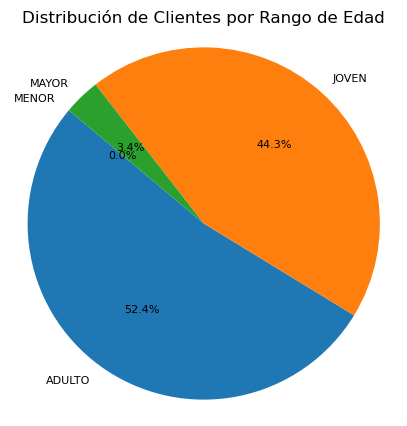

In [52]:
# Calcular las frecuencias de cada rango de edad
aux_conteo_rango_edad_v4 = df_Clientes_v4['rango_edad'].value_counts()

# Crear el gráfico de torta con tamaño 5x5
plt.figure(figsize=(5, 5))
plt.pie(aux_conteo_rango_edad_v4, labels=aux_conteo_rango_edad_v4.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8}) # Ajuste el tamaño de la fuente de los porcentajes
plt.title('Distribución de Clientes por Rango de Edad')
plt.axis('equal')  # Asegura que el gráfico de torta sea un círculo
plt.show()


Calculando la suma de 'ingresos' agrupada por ['ciudad', 'rango_edad'] en el dataframe 'df_Clientes_v4':


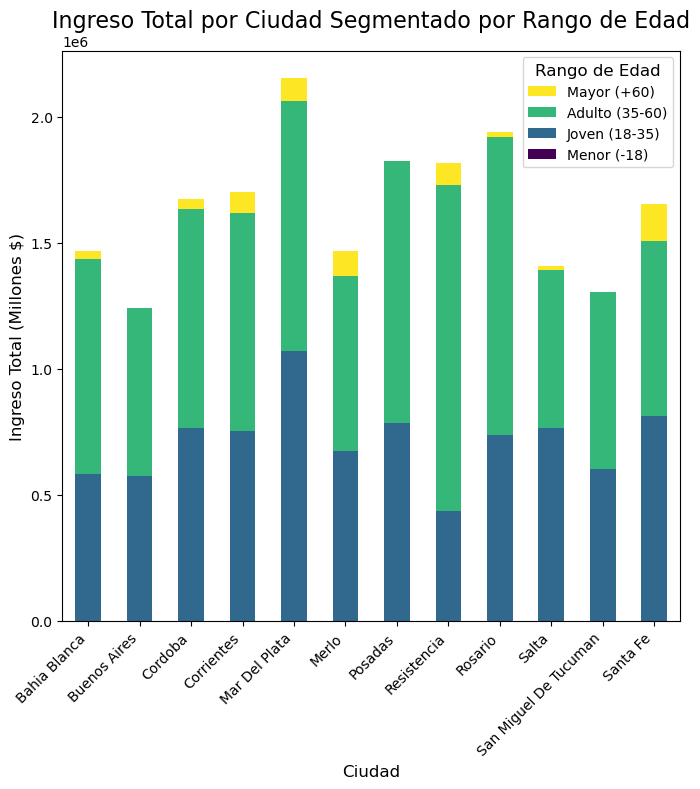

In [53]:
# Se Hizo en pasos y aportando la mayor configuracion posible
aux_ingresos_por_ciudad_edad_v4 = sumar_por_categoria(
  DF=df_Clientes_v4,
  columna_categoria= ['ciudad','rango_edad'],
  columna_dato='ingresos',
  nombre="df_Clientes_v4"
)
aux_ingresos_por_ciudad_edad_v4 = aux_ingresos_por_ciudad_edad_v4.pivot(index='ciudad', columns='rango_edad', values='suma_ingresos').fillna(0)

# Definir el orden de los rangos de edad
# En este caso estan ordenados pero muchas veces el orden esta asociado a una lógica.
orden_rangos_edad = ['MENOR', 'JOVEN', 'ADULTO', 'MAYOR']

# Filtrar las columnas a graficar
columnas_grafico = [col for col in orden_rangos_edad if col in aux_ingresos_por_ciudad_edad_v4.columns]

# Crear el gráfico de barras apiladas
ax = aux_ingresos_por_ciudad_edad_v4[columnas_grafico].plot(kind='bar', stacked=True, figsize=(7, 8), cmap='viridis')

# Configurar título y etiquetas personalizadas (en este caso podría saltarse este paso)
ax.set_title('Ingreso Total por Ciudad Segmentado por Rango de Edad', fontsize=16)
ax.set_xlabel('Ciudad', fontsize=12)
ax.set_ylabel('Ingreso Total (Millones $)', fontsize=12)

# Configurar la rotación y alineación de las etiquetas del eje x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.tick_params(axis='y', labelsize=10)

# Configurar leyendas personalizadas y asegurar el orden visual con las barras
mapa_etiquetas_leyenda = {'MENOR': 'Menor (-18)', 'JOVEN': 'Joven (18-35)', 'ADULTO': 'Adulto (35-60)', 'MAYOR': 'Mayor (+60)'}

elementos_leyenda, etiquetas_trazado = ax.get_legend_handles_labels()

# Orden visual deseado para la leyenda (de arriba a abajo así coincide con la gráfica)
orden_visual_leyenda = orden_rangos_edad[::-1]

nuevos_elementos_leyenda = []
nuevas_etiquetas_leyenda = []

for clave_categoria in orden_visual_leyenda:
    try:
        indice = etiquetas_trazado.index(clave_categoria)
        nuevos_elementos_leyenda.append(elementos_leyenda[indice])
        nuevas_etiquetas_leyenda.append(mapa_etiquetas_leyenda.get(clave_categoria, clave_categoria))
    except ValueError:
        pass

ax.legend(nuevos_elementos_leyenda, nuevas_etiquetas_leyenda, title='Rango de Edad', title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

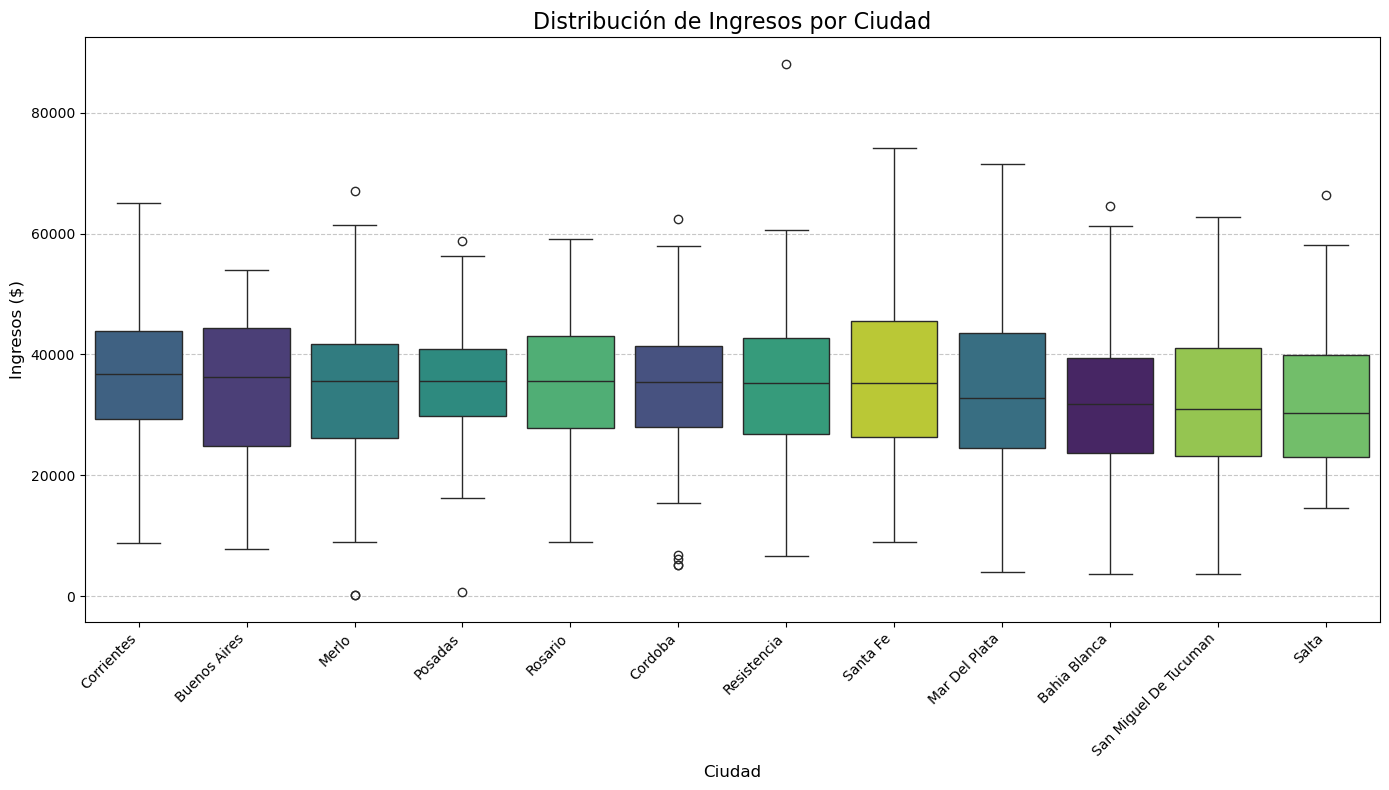

In [54]:
# Ordenar las ciudades por la mediana de ingresos para una mejor visualización
ordenc_ciudades_por_ingreso_mediana = df_Clientes_v4.groupby('ciudad', observed=False)['ingresos'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.boxplot(x='ciudad', y='ingresos', data=df_Clientes_v4, order=ordenc_ciudades_por_ingreso_mediana, palette='viridis', hue='ciudad', legend=False)

plt.title('Distribución de Ingresos por Ciudad', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [55]:
# A los efectos de ver informacion en un mapa con la libreria leaflet
lista_ciudades_geocodificadas =[
  {'ciudad': 'Bahia Blanca', 'latitud': -38.7176522, 'longitud': -62.2654871},
  {'ciudad': 'Buenos Aires', 'latitud': -34.6095579, 'longitud': -58.3887904},
  {'ciudad': 'Cordoba', 'latitud': -31.4166867, 'longitud': -64.1834193},
  {'ciudad': 'Corrientes', 'latitud': -29.0177384, 'longitud': -57.8869739},
  {'ciudad': 'Mar Del Plata', 'latitud': -37.9976168, 'longitud': -57.5482079},
  {'ciudad': 'Merlo', 'latitud': -34.6604988, 'longitud': -58.7321695},
  {'ciudad': 'Posadas', 'latitud': -27.3664824, 'longitud': -55.894295},
  {'ciudad': 'Resistencia', 'latitud': -27.6048829, 'longitud': -59.1932003},
  {'ciudad': 'Rosario', 'latitud': -32.9593609, 'longitud': -60.6617024},
  {'ciudad': 'Salta', 'latitud': -25.2269908, 'longitud': -64.5911956},
  {'ciudad': 'San Miguel De Tucuman', 'latitud': -26.8303703, 'longitud': -65.2038133},
  {'ciudad': 'Santa Fe', 'latitud': -30.3154739, 'longitud': -61.1645076}
]

aux_geo_localidades_v4 = pd.DataFrame(lista_ciudades_geocodificadas)

# Calcular el ingreso total por ciudad
ingreso_total_por_ciudad = df_Clientes_v4.groupby('ciudad', observed=False)['ingresos'].sum().reset_index()
# Ordenar las ciudades por ingreso total de forma descendente
ingreso_total_por_ciudad_ordenado = ingreso_total_por_ciudad.sort_values(by='ingresos', ascending=False)


# Unir aux_geo_localidades_v4 con ingreso_total_por_ciudad_ordenado para incluir los ingresos
aux_geo_localidades_v4_con_ingresos = pd.merge(aux_geo_localidades_v4, ingreso_total_por_ciudad_ordenado, on='ciudad', how='left')

# Coordenadas aproximadas del centro de Argentina para centrar el mapa
centro_argentina = [-34.0, -64.0]

# Crear un mapa base con folium y especificar el ancho y alto
m = folium.Map(location=centro_argentina, zoom_start=5, width=600, height=400)

# Añadir CircleMarkers para cada ciudad, con radio basado en ingresos
# Escalar los ingresos para que el radio sea manejable. Un factor de 10000 puede ser un buen inicio.
factor_escala_radio = 50000  # Ajustar este valor para controlar el tamaño relativo de los círculos

for index, row in aux_geo_localidades_v4_con_ingresos.iterrows():
    # Calcular el radio del círculo. Asegurarse de que el radio sea al menos 1 para que sea visible.
    radio_circulo = max(1, int(row['ingresos'] / factor_escala_radio))

    folium.CircleMarker(
        location=[row['latitud'], row['longitud']],
        radius=radio_circulo,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"<b>Ciudad:</b> {row['ciudad']}<br><b>Ingresos:</b> ${row['ingresos']:,.2f}<br><br><i>Click para ver más datos.</i>",
        tooltip=row['ciudad'] # Muestra el nombre de la ciudad al pasar el ratón
    ).add_to(m)

# Mostrar el mapa
m

#### Comentarios y Conclusiones del Análisis de Clientes

##### Perfil Demográfico y Socioeconómico:

*   **Edad:** La distribución de clientes por rango de edad muestra una concentración significativa en los segmentos 'JOVEN' y 'ADULTO', lo que indica que la mayoría de nuestra base de clientes se encuentra en edades productivas. Los rangos 'MENOR' y 'MAYOR' tienen una representación menor.
*   **Ingresos:** La distribución de los rangos de ingresos (`BAJO`, `MEDIO_BAJO`, `MEDIO_ALTO`, `ALTO`) varía entre ciudades, pero en general se observa una buena mezcla de perfiles socioeconómicos en la cartera de clientes.

##### Distribución Geográfica de Ingresos:

*   **Ingresos Totales por Ciudad:** Ciudades como Mar del Plata y Rosario destacan por generar los mayores ingresos totales, lo que las convierte en puntos clave para futuras estrategias. Córdoba, Posadas y Resistencia también muestran contribuciones significativas.
*   **Distribución de Ingresos por Ciudad:** Los boxplots revelan cómo se distribuyen los ingresos dentro de cada ciudad. Esto es crucial, ya que ciudades con ingresos totales similares pueden tener distribuciones muy diferentes (por ejemplo, una con muchos clientes de ingresos medios y otra con pocos clientes de ingresos muy altos).
*   **Mapa Interactivo:** La visualización en el mapa permite identificar geográficamente las ciudades con mayor concentración de ingresos, lo que puede ser útil para la planificación de expansión o la localización de campañas específicas.

##### Consideraciones Adicionales:

*   La comparación entre la media y la mediana de edad e ingresos sugiere que la distribución de estas variables es relativamente simétrica, sin sesgos extremos que podrían indicar problemas en la calidad de los datos o la representatividad de la muestra.
*   La segmentación por `rango_edad` y `rango_ingresos` proporciona bases sólidas para estrategias de marketing más personalizadas y para la identificación de segmentos de clientes con necesidades y comportamientos de compra específicos.

En resumen, el análisis de clientes proporciona una base sólida para entender quiénes son nuestros clientes, dónde se encuentran y cuál es su perfil socioeconómico, información vital para la toma de decisiones estratégicas en marketing y ventas.

### b) Información de Marketing.

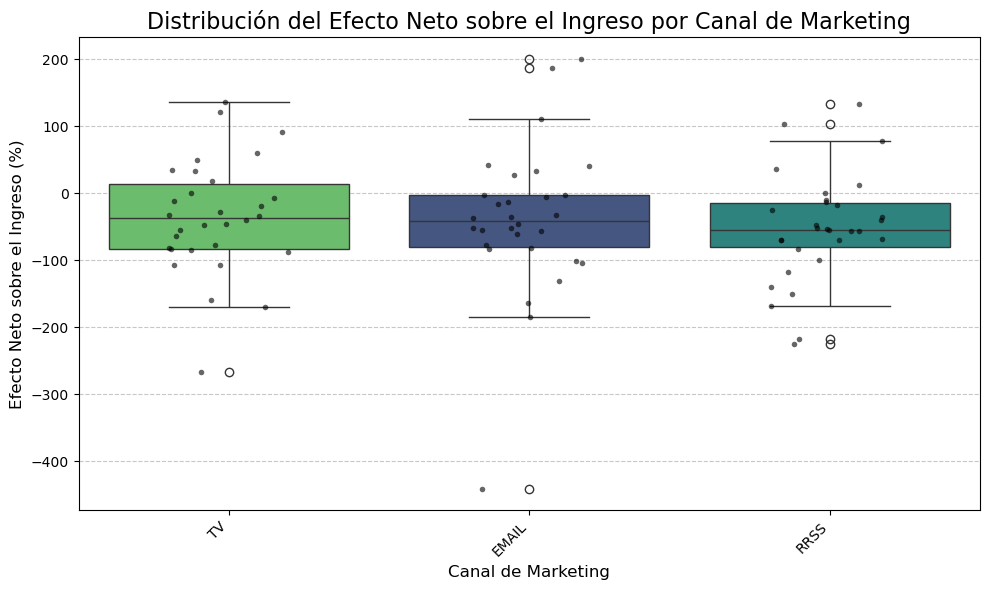

In [56]:
# Ordenar los canales por el efecto neto promedio para una mejor visualización
orden_canales = df_Marketing_v4.groupby('canal', observed=False)['efecto_neto_sobre_el_ingreso'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

# Crear un boxplot para mostrar la distribución de los efectos netos por canal
sns.boxplot(x='canal', y='efecto_neto_sobre_el_ingreso', data=df_Marketing_v4, order=orden_canales, palette='viridis', hue='canal', legend=False)

# Superponer un stripplot (lluvia de puntos) para mostrar cada campaña individual
sns.stripplot(x='canal', y='efecto_neto_sobre_el_ingreso', data=df_Marketing_v4, order=orden_canales, color='black', size=4, jitter=0.2, alpha=0.6)

plt.title('Distribución del Efecto Neto sobre el Ingreso por Canal de Marketing', fontsize=16)
plt.xlabel('Canal de Marketing', fontsize=12)
plt.ylabel('Efecto Neto sobre el Ingreso (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

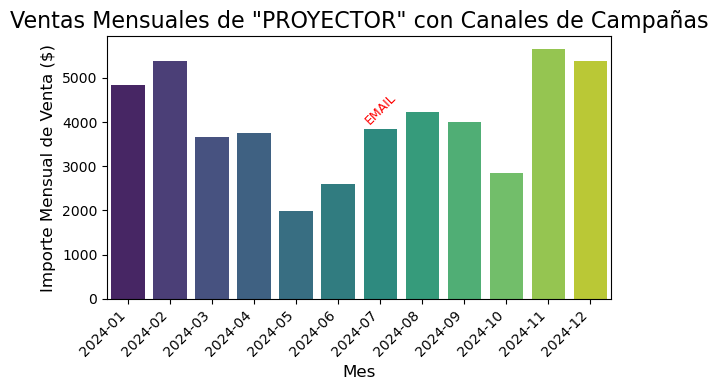

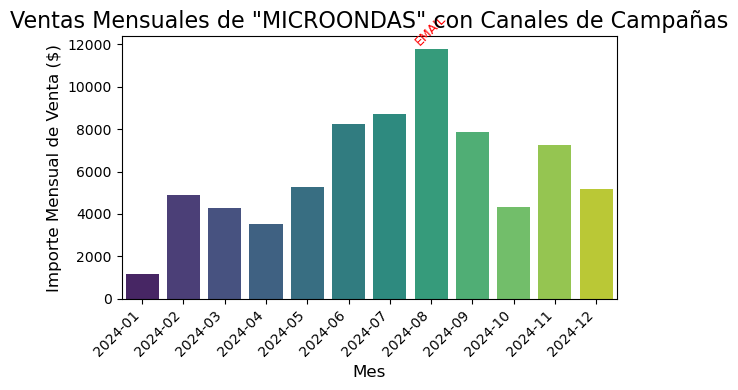

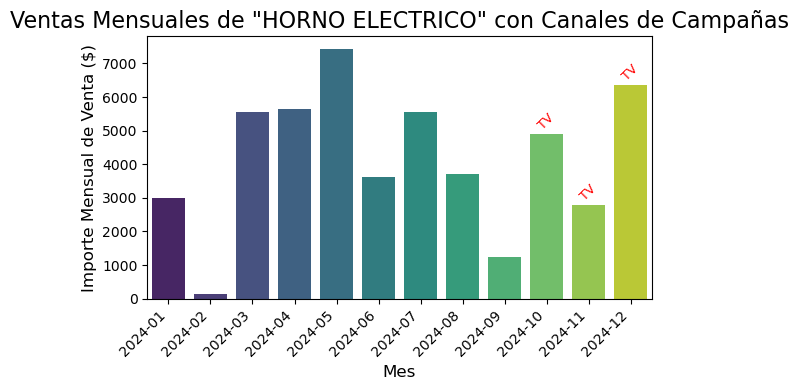

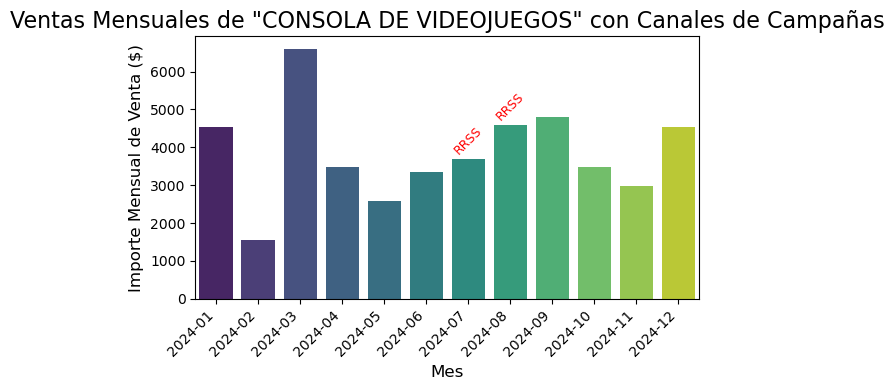

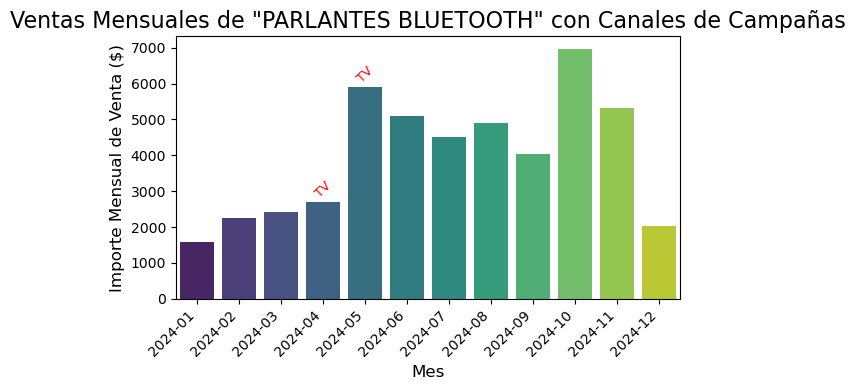

In [57]:
# Ejemplos de Exito donde la campaña logro revertir la tendencia y mejorar la situacion previa a la misma.
aux_Marketing_top5_efecto_neto_v4 = df_Marketing_v4.sort_values(by='efecto_neto_sobre_el_ingreso', ascending=False).head(5)
aux_Marketing_top5_productos_efecto_neto_v4 = aux_Marketing_top5_efecto_neto_v4['producto'].tolist()

for producto_objetivo in aux_Marketing_top5_productos_efecto_neto_v4:
    # 1. Filtrar ventas para el producto objetivo
    ventas_producto = df_Ventas_v4[df_Ventas_v4['producto'] == producto_objetivo]

    # 2. Agrupar por mes y sumar el importe bruto de venta
    ventas_mensuales_producto = ventas_producto.groupby('yyyy_mm_venta')['importe_bruto_venta'].sum().reset_index()

    # 3. Filtrar campañas de marketing para el producto objetivo, usando solo el top 5 de marketing
    campanas_producto = aux_Marketing_top5_efecto_neto_v4[aux_Marketing_top5_efecto_neto_v4['producto'] == producto_objetivo]

    # 4. Crear un diccionario para almacenar los canales activos por mes de campaña
    canales_por_mes_campana = {}
    for _, row_campana in campanas_producto.iterrows():
        fecha_inicio_campana = pd.to_datetime(row_campana['fecha_inicio'])
        fecha_fin_campana = pd.to_datetime(row_campana['fecha_fin'])
        canal = row_campana['canal']

        # Crear un rango de periodos mensuales que abarque la campaña
        rango_meses = pd.period_range(start=fecha_inicio_campana, end=fecha_fin_campana, freq='M')
        for mes_period in rango_meses:
            if mes_period not in canales_por_mes_campana:
                canales_por_mes_campana[mes_period] = set()
            canales_por_mes_campana[mes_period].add(canal)

    # 5. Crear el gráfico de barras
    plt.figure(figsize=(6, 4))
    sns.barplot(x='yyyy_mm_venta', y='importe_bruto_venta', data=ventas_mensuales_producto, palette='viridis', hue='yyyy_mm_venta', legend=False)

    plt.title(f'Ventas Mensuales de "{producto_objetivo}" con Canales de Campañas', fontsize=16)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Importe Mensual de Venta ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # 6. Añadir los nombres de los canales para los meses con campañas activas
    for index, row_venta in ventas_mensuales_producto.iterrows():
        mes_actual = row_venta['yyyy_mm_venta']
        if mes_actual in canales_por_mes_campana:
            canales_activos = sorted(list(canales_por_mes_campana[mes_actual])) # Ordenar para consistencia
            texto_canales = ', '.join(canales_activos)
            # Ajustar el offset +50 si el texto se superpone con las barras
            plt.text(index, row_venta['importe_bruto_venta'] + 50,
                     texto_canales,
                     color='red', ha='center', va='bottom', fontsize=9, rotation=45)

    plt.tight_layout()
    plt.show()


Calculando la suma de 'costo' agrupada por ['producto'] en el dataframe 'df_Marketing_v4':


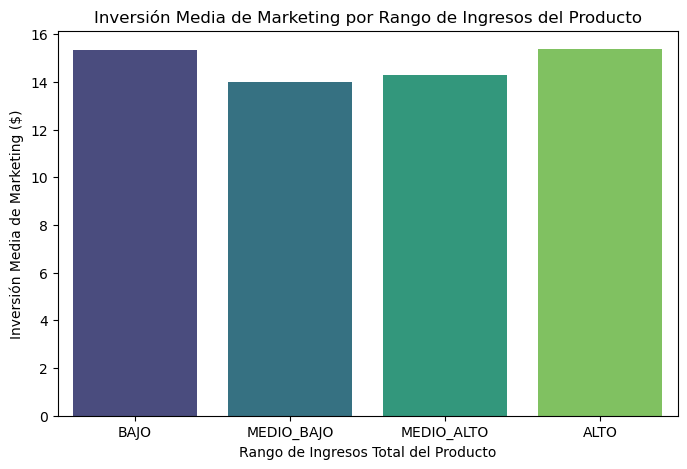

In [58]:
df_inversion_marketing_por_producto = sumar_por_categoria(
    DF=df_Marketing_v4,
    columna_categoria='producto',
    columna_dato='costo',
    nombre="df_Marketing_v4"
)

df_marketing_ingresos_integrado = pd.merge(
    df_resumen_ingreso_producto_v4,
    df_inversion_marketing_por_producto,
    on='producto',
    how='left'  # Use a left merge to keep all products from the revenue summary
)

aux_inversion_media_por_rango_v4 = df_marketing_ingresos_integrado.groupby('rango_ingreso_total')['suma_costo'].mean().reset_index()

# Define the desired order for 'rango_ingreso_total' categories
orden_rango_ingreso = ['BAJO', 'MEDIO_BAJO', 'MEDIO_ALTO', 'ALTO']

# Convert 'rango_ingreso_total' to a categorical type with the specified order
aux_inversion_media_por_rango_v4['rango_ingreso_total'] = pd.Categorical(
    aux_inversion_media_por_rango_v4['rango_ingreso_total'],
    categories=orden_rango_ingreso,
    ordered=True
)

# Sort the DataFrame by the ordered categorical column
aux_inversion_media_por_rango_v4 = aux_inversion_media_por_rango_v4.sort_values('rango_ingreso_total')

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='rango_ingreso_total',
    y='suma_costo',
    data=aux_inversion_media_por_rango_v4,
    palette='viridis',
    hue='rango_ingreso_total',
    legend=False
)

# Add title and labels
plt.title('Inversión Media de Marketing por Rango de Ingresos del Producto')
plt.xlabel('Rango de Ingresos Total del Producto')
plt.ylabel('Inversión Media de Marketing ($)')

# Display the plot
plt.show()

#### Comentarios y Conclusiones del Análisis de Marketing

##### Efectividad por Canal y Campaña:

*   **Distribución del Efecto Neto:** El gráfico de cajas y la 'lluvia de puntos' para el 'Efecto Neto sobre el Ingreso por Canal de Marketing' revelan una dispersión significativa. Esto indica que, aunque algunos canales pueden tener campañas con un efecto muy positivo, otros muestran una gran variabilidad, incluyendo muchas campañas con efectos nulos o incluso negativos.
*   **Rendimiento Variado:** No todos los canales son igualmente efectivos. Es crucial analizar en detalle por qué ciertas campañas en algunos canales tienen un mejor rendimiento que otras. Por ejemplo, el canal 'RRSS' muestra una amplia dispersión, lo que sugiere que no todas las campañas en redes sociales son exitosas.
*   **Visión a Nivel de Producto:** Los gráficos individuales para los 5 productos con mayor efecto neto positivo (`PROYECTOR`, `MICROONDAS`, `HORNO ELECTRICO`, `CONSOLA DE VIDEOJUEGOS`, `PARLANTES BLUETOOTH`) nos permiten observar cómo se correlaciona la activación de campañas en diferentes canales con las ventas mensuales. Esto es fundamental para entender el impacto micro de las estrategias de marketing.

##### Implicaciones:

*   La heterogeneidad en el 'efecto neto sobre el ingreso' por canal y campaña subraya la importancia de optimizar las estrategias de marketing. No se trata solo de invertir, sino de invertir de forma inteligente, segmentando y personalizando las campañas.
*   La presencia de un 'efecto neto negativo' en un número considerable de campañas sugiere que los costos de marketing a menudo superan los ingresos adicionales generados, lo que requiere una revisión de la asignación de presupuestos y la efectividad del mensaje.

En resumen, el análisis de marketing muestra que hay margen para mejorar la eficiencia de las campañas, identificando los canales y estrategias más rentables y optimizando aquellos que no están generando un retorno positivo.

### c) Información de Ventas.

In [59]:
print("\nComparación de Media y Mediana para Precio, Cantidad e Importe Bruto de Ventas:")
print(f"Precio - Media: {df_Ventas_v4['precio'].mean():.2f}, Mediana: {df_Ventas_v4['precio'].median():.2f}")
print(f"Cantidad - Media: {df_Ventas_v4['cantidad'].mean():.2f}, Mediana: {df_Ventas_v4['cantidad'].median():.2f}")
print(f"Importe Bruto de Ventas - Media: {df_Ventas_v4['importe_bruto_venta'].mean():.2f}, Mediana: {df_Ventas_v4['importe_bruto_venta'].median():.2f}")

df_Ventas_v4.describe(include= "all")


Comparación de Media y Mediana para Precio, Cantidad e Importe Bruto de Ventas:
Precio - Media: 75.29, Mediana: 75.20
Cantidad - Media: 6.50, Mediana: 7.00
Importe Bruto de Ventas - Media: 489.36, Mediana: 418.06


,id_venta,producto,precio,cantidad,fecha_venta,categoria,yyyy_mm_venta,importe_bruto_venta,rango_importe_bruto_venta
count,2998.000000,2998,2998.000000,2998.000000,2998,2998,2998,2998.000000,2998
unique,NaN,30,NaN,NaN,NaN,3,12,NaN,5
top,NaN,LAMPARA DE MESA,NaN,NaN,NaN,DECORACION,2024-04,NaN,BAJO
freq,NaN,176,NaN,NaN,NaN,1000,275,NaN,749
mean,1500.567712,NaN,75.291318,6.502668,2024-06-26 21:57:02.281520896,NaN,NaN,489.357412,NaN
min,1.000000,NaN,26.000000,1.000000,2024-01-02 00:00:00,NaN,NaN,26.300000,NaN
25%,751.250000,NaN,50.030000,3.000000,2024-03-27 00:00:00,NaN,NaN,220.920000,NaN
50%,1500.500000,NaN,75.205000,7.000000,2024-06-24 00:00:00,NaN,NaN,418.065000,NaN
75%,2250.750000,NaN,100.067500,9.000000,2024-09-27 00:00:00,NaN,NaN,709.920000,NaN
max,3000.000000,NaN,124.970000,12.000000,2024-12-30 00:00:00,NaN,NaN,1488.120000,NaN


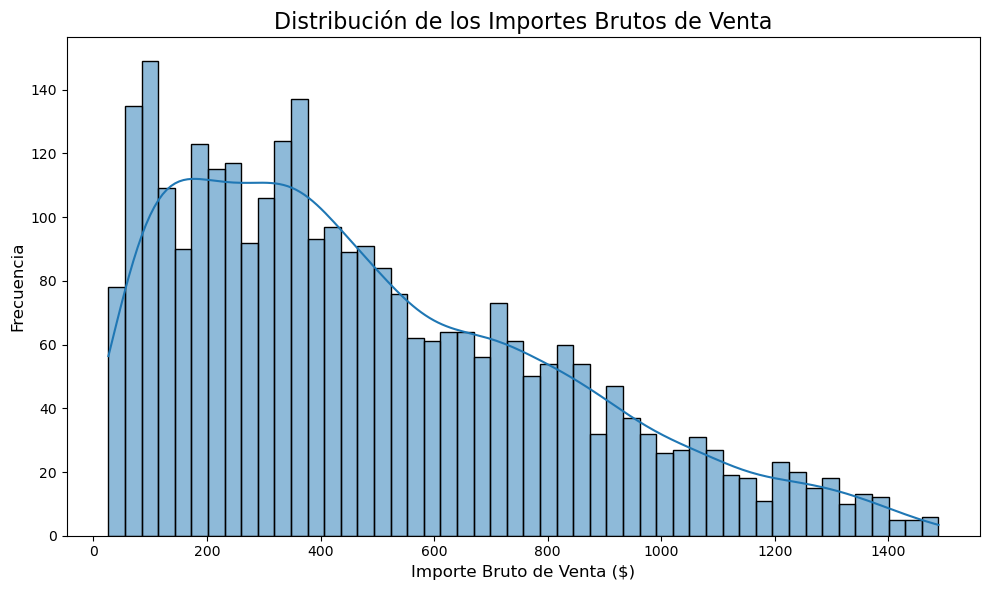

In [60]:
# 2. Histograma para la Distribución de los Importes de Venta

plt.figure(figsize=(10, 6))
sns.histplot(df_Ventas_v4['importe_bruto_venta'], bins=50, kde=True)

plt.title('Distribución de los Importes Brutos de Venta', fontsize=16)
plt.xlabel('Importe Bruto de Venta ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.tight_layout()
plt.show()

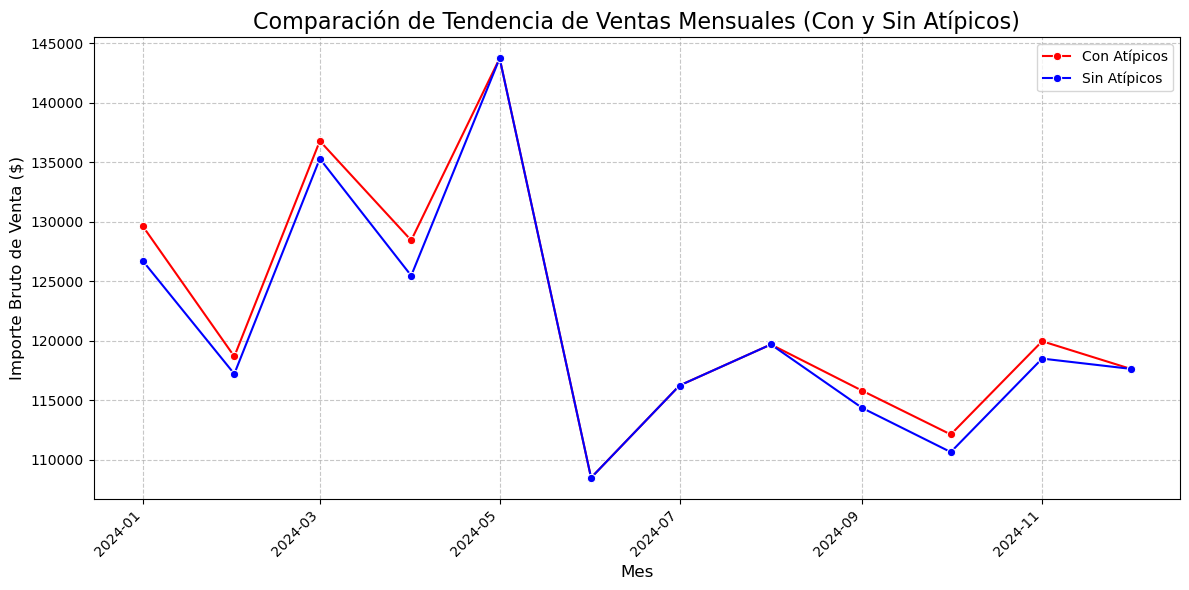

In [61]:
# 1. Gráfico de líneas para la Tendencia de Ventas a lo Largo del Tiempo (comparativo)

# --- Datos con Atípicos (Ventana completa) ---
# Agrupar por mes y sumar el importe bruto de venta
aux_ventas_mensuales_totales_v4 = df_Ventas_v4.groupby('yyyy_mm_venta')['importe_bruto_venta'].sum().reset_index()
# Convertir 'yyyy_mm_venta' a tipo datetime
aux_ventas_mensuales_totales_v4['yyyy_mm_venta'] = aux_ventas_mensuales_totales_v4['yyyy_mm_venta'].dt.to_timestamp()

# --- Datos sin Atípicos ---
# Filtrar df_Ventas_v4 para excluir valores atípicos en 'rango_importe_bruto_venta'
df_Ventas_sin_atipicos = df_Ventas_v4[
    (~df_Ventas_v4['rango_importe_bruto_venta'].isin(['VALOR_ATIPICO_INFERIOR', 'VALOR_ATIPICO_SUPERIOR']))
].copy()
# Agrupar por mes y sumar el importe bruto de venta del DataFrame sin atípicos
aux_ventas_mensuales_totales_sin_atipicos_v4 = df_Ventas_sin_atipicos.groupby('yyyy_mm_venta')['importe_bruto_venta'].sum().reset_index()
# Convertir 'yyyy_mm_venta' a tipo datetime
aux_ventas_mensuales_totales_sin_atipicos_v4['yyyy_mm_venta'] = aux_ventas_mensuales_totales_sin_atipicos_v4['yyyy_mm_venta'].dt.to_timestamp()


plt.figure(figsize=(12, 6))
# Plotear la línea con atípicos
sns.lineplot(x='yyyy_mm_venta', y='importe_bruto_venta', data=aux_ventas_mensuales_totales_v4, marker='o', label='Con Atípicos', color='red')
# Plotear la línea sin atípicos
sns.lineplot(x='yyyy_mm_venta', y='importe_bruto_venta', data=aux_ventas_mensuales_totales_sin_atipicos_v4, marker='o', label='Sin Atípicos', color='blue')

plt.title('Comparación de Tendencia de Ventas Mensuales (Con y Sin Atípicos)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Importe Bruto de Venta ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:

aux_ventas_mensuales_por_producto_v4 = df_Ventas_v4.groupby(['yyyy_mm_venta', 'producto'])['importe_bruto_venta'].sum().reset_index()

# Obtener nombres únicos de productos para el menú desplegable
nombres_productos = aux_ventas_mensuales_por_producto_v4['producto'].unique()

# Inicializar la figura
fig = go.Figure()

for producto in nombres_productos:
    df_producto = aux_ventas_mensuales_por_producto_v4[aux_ventas_mensuales_por_producto_v4['producto'] == producto]
    fig.add_trace(go.Scatter(
        x=df_producto['yyyy_mm_venta'].astype(str),  # Convertir Period a string para graficar
        y=df_producto['importe_bruto_venta'],
        mode='lines+markers',
        name=producto,
        visible=(producto == nombres_productos[0]) # Solo el primer producto es visible por defecto
    ))

# Crear menú desplegable
botones = []
for i, producto in enumerate(nombres_productos):
    visibilidad = [False] * len(nombres_productos)
    visibilidad[i] = True
    botones.append(dict(
        label=producto,
        method='update',
        args=[{'visible': visibilidad}, {'title': f'Tendencia de Ventas Mensuales para {producto}'}]
    ))

fig.update_layout(
    updatemenus=[dict(
        type='dropdown',
        direction='down',
        x=0.01,
        xanchor='left',
        y=1.1, # Ajustado para bajar la ventana de selección
        yanchor='top',
        showactive=True,
        buttons=botones
    )],
    title_text=f'Tendencia de Ventas Mensuales para {nombres_productos[0]}',
    xaxis_title='Mes',
    yaxis_title='Importe Bruto de Ventas ($)',
    hovermode='x unified',
    title_y=0.95 # Ajustado para subir un poco el título si es necesario
)

fig.show()

print("Tablero de control interactivo: Ingresos Brutos por Producto.")

Tablero de control interactivo: Ingresos Brutos por Producto.


In [63]:
# Obtener nombres únicos de productos para el menú desplegable
nombres_productos = df_Ventas_v4['producto'].unique()

# Inicializar la figura de Plotly
figura = go.Figure()

# Añadir un boxplot de precio y cantidad para cada producto
# Todos los traces se añaden como invisibles inicialmente
for indice, producto in enumerate(nombres_productos):
    df_producto = df_Ventas_v4[df_Ventas_v4['producto'] == producto]

    # Boxplot de Precios
    figura.add_trace(go.Box(
        y=df_producto['precio'],
        name=f'Precio - {producto}',
        visible=False, # Todos invisibles por defecto
        boxpoints='outliers',
        marker_color='blue'
    ))

    # Boxplot de Cantidades
    figura.add_trace(go.Box(
        y=df_producto['cantidad'],
        name=f'Cantidad - {producto}',
        visible=False, # Todos invisibles por defecto
        boxpoints='outliers',
        marker_color='red'
    ))

# Crear la estructura de botones para el menú desplegable
botones_menu = []
num_traces = len(nombres_productos) * 2 # Total de traces (2 por producto)

for i, producto in enumerate(nombres_productos):
    # Botón para la métrica "Precio" del producto actual
    visibilidad_precio = [False] * num_traces
    visibilidad_precio[i * 2] = True # Hacer visible solo el trace de precio del producto actual
    botones_menu.append(dict(
        label=f'{producto} - Precio',
        method='update',
        args=[
            {'visible': visibilidad_precio},
            {'title': f'Distribución de Precios para {producto}',
             'yaxis': {'title': 'Precio ($)'}}
        ]
    ))

    # Botón para la métrica "Cantidad" del producto actual
    visibilidad_cantidad = [False] * num_traces
    visibilidad_cantidad[i * 2 + 1] = True # Hacer visible solo el trace de cantidad del producto actual
    botones_menu.append(dict(
        label=f'{producto} - Cantidad',
        method='update',
        args=[
            {'visible': visibilidad_cantidad},
            {'title': f'Distribución de Cantidades para {producto}',
             'yaxis': {'title': 'Cantidad Vendida'}}
        ]
    ))

# Establecer la visibilidad inicial al cargar el gráfico
# Hacer visible el primer boxplot de Precio por defecto
figura.data[0].visible = True

# Actualizar el layout de la figura con el menú desplegable
figura.update_layout(
    updatemenus=[dict(
        type='dropdown',
        direction='down',
        x=0.01,
        xanchor='left',
        y=1.1,
        yanchor='top',
        showactive=True,
        buttons=botones_menu
    )],
    title_text=f'Distribución de Precios para {nombres_productos[0]}', # Título inicial
    xaxis_title='Métrica del producto y opcion seleccionado',
    yaxis_title='Precio ($)', # Etiqueta del eje Y inicial
    hovermode='closest',
    title_y=0.95
)

# Mostrar la figura interactiva
figura.show()


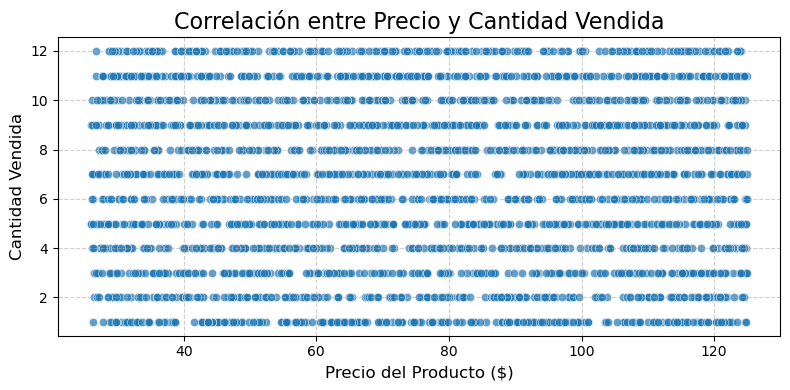

In [64]:
# Crear el gráfico de dispersión (scatter plot) con altura reducida
plt.figure(figsize=(8, 4)) # Altura reducida a 6
sns.scatterplot(x='precio', y='cantidad', data=df_Ventas_v4, alpha=0.7)

# Configurar título y etiquetas en español
plt.title('Correlación entre Precio y Cantidad Vendida', fontsize=16)
plt.xlabel('Precio del Producto ($)', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [65]:
# Calcular el coeficiente de correlación de Pearson entre precio y cantidad
coeficiente_correlacion = df_Ventas_v4['precio'].corr(df_Ventas_v4['cantidad'])

print(f"Coeficiente de correlación (Pearson) entre Precio y Cantidad Vendida: {coeficiente_correlacion:.2f}")

# Interpretar la fuerza de la correlación
absoluto_coeficiente = abs(coeficiente_correlacion)

if absoluto_coeficiente >= 0.9:
    interpretacion = "casi perfecta"
elif absoluto_coeficiente >= 0.7:
    interpretacion = "muy fuerte"
elif absoluto_coeficiente >= 0.5:
    interpretacion = "fuerte"
elif absoluto_coeficiente >= 0.3:
    interpretacion = "moderada"
elif absoluto_coeficiente >= 0.1:
    interpretacion = "débil"
else:
    interpretacion = "despreciable o nula"

print(f"La relación detectada es {interpretacion}.")

Coeficiente de correlación (Pearson) entre Precio y Cantidad Vendida: -0.00
La relación detectada es despreciable o nula.


##### Comentarios y Conclusiones del Análisis de Ventas

###### Tendencia de Ventas y Distribución:

*   **Ventas Mensuales:** El análisis de la tendencia de ventas mensuales muestra un comportamiento relativamente estable a lo largo del año, con algunas fluctuaciones. La comparación entre las ventas 'Con Atípicos' y 'Sin Atípicos' en el gráfico de líneas indica que los valores extremos (`VALOR_ATIPICO_INFERIOR`, `VALOR_ATIPICO_SUPERIOR`) tienen un impacto moderado en el importe total mensual, pero no alteran drásticamente la tendencia general.
*   **Distribución de Importes de Venta:** El histograma del `importe_bruto_venta` revela que la mayoría de las ventas se concentran en rangos de importes medios a bajos, con una cola más larga hacia valores más altos, pero con menor frecuencia.
*   **Ventas por Producto:** El panel interactivo permite analizar la tendencia de ventas mensuales de cada producto individualmente, lo cual es útil para identificar patrones específicos o estacionalidades por producto.

###### Correlación entre Precio y Cantidad Vendida:

*   **Coeficiente de Correlación:** El coeficiente de correlación de Pearson entre 'precio' y 'cantidad vendida' resultó ser de -0.00. Esto indica una **relación despreciable o nula** entre el precio de un producto y la cantidad vendida. En otras palabras, en este conjunto de datos, no se observa que un aumento o disminución en el precio se relacione de manera lineal y consistente con un cambio en la cantidad que los clientes compran.
*   **Visualización (Scatter Plot y Mapa de Calor):** El gráfico de dispersión y el mapa de calor confirman visualmente esta falta de correlación lineal clara. Los puntos (o la densidad en el mapa de calor) se distribuyen ampliamente sin una dirección o patrón definido, lo que refuerza la conclusión de que no existe una relación lineal fuerte entre ambas variables.

###### Implicaciones:

*   La falta de correlación lineal entre precio y cantidad sugiere que otros factores (como la demanda del producto, la calidad percibida, la marca, las campañas de marketing, o la necesidad del cliente) podrían estar influyendo más significativamente en las decisiones de compra que el precio por sí solo.
*   Para los análisis de tendencia por producto, las herramientas interactivas son cruciales para entender el comportamiento individual, ya que los promedios generales pueden enmascarar dinámicas importantes a nivel de producto.

En resumen, el análisis de ventas nos proporciona una visión general de las tendencias y distribuciones, pero destaca la complejidad de la relación precio-cantidad, sugiriendo la necesidad de explorar otros factores que impulsan el comportamiento de compra.

# L) Conversion final de los DataFrame modificados a CSV.


In [66]:
try:
    from google.colab import drive
    import os

    # Montar Google Drive
    drive.mount('/content/drive')
    dir_salida = '/content/drive/MyDrive/datasets/datos_procesados'

    # Crear el directorio si no existe
    if not os.path.exists(dir_salida):
        os.makedirs(dir_salida)
        print(f"Directorio '{dir_salida}' creado.")
    else:
        print(f"Directorio '{dir_salida}' ya existe.")

    # Guardar los DataFrames terminados en _v4
    dataframes_a_guardar = {
        'df_Clientes_v4': df_Clientes_v4,
        'df_Marketing_v4': df_Marketing_v4,
        'df_Ventas_v4': df_Ventas_v4,
        'df_aux_prod_alto_rendimiento_v4': df_aux_prod_alto_rendimiento_v4,
        'df_resumen_ingreso_producto_v4': df_resumen_ingreso_producto_v4,
        'aux_conteo_rango_edad_v4': aux_conteo_rango_edad_v4,
        'aux_ingresos_por_ciudad_edad_v4': aux_ingresos_por_ciudad_edad_v4,
        'aux_Marketing_top5_efecto_neto_v4' : aux_Marketing_top5_efecto_neto_v4,
        'aux_inversion_media_por_rango_v4' : aux_inversion_media_por_rango_v4,
        'aux_ventas_mensuales_totales_v4' : aux_ventas_mensuales_totales_v4,
        'aux_ventas_mensuales_totales_sin_atipicos_v4' : aux_ventas_mensuales_totales_sin_atipicos_v4,
        'aux_ventas_mensuales_por_producto_v4' : aux_ventas_mensuales_por_producto_v4
    }

    for name, df in dataframes_a_guardar.items():
        file_path = os.path.join(dir_salida, f'{name}.csv')
        df.to_csv(file_path, index=False)
        print(f"DataFrame '{name}' guardado en '{file_path}'")

except ModuleNotFoundError:
    # Entorno local: no hacer nada
    print("google.colab no disponible: saltando mount de Drive (entorno local).")

google.colab no disponible: saltando mount de Drive (entorno local).


In [67]:
try:
    from google.colab import drive
    # Entorno Google Colab
    drive.mount('/content/drive')
    dir_salida = '/content/drive/MyDrive/datasets/datos_procesados'

    if not os.path.exists(dir_salida):
        os.makedirs(dir_salida)
        print(f"Directorio '{dir_salida}' creado en Google Drive.")
    else:
        print(f"Directorio '{dir_salida}' ya existe en Google Drive.")

    print("Guardando DataFrames en Google Drive...")
    for name, df in dataframes_a_guardar.items():
        file_path = os.path.join(dir_salida, f'{name}.csv')
        df.to_csv(file_path, index=False)
        print(f"DataFrame '{name}' guardado en '{file_path}'")

except ModuleNotFoundError:
    # Entorno local
    dir_salida = '../datasets/datos_procesados'

    if not os.path.exists(dir_salida):
        os.makedirs(dir_salida)
        print(f"Directorio '{dir_salida}' creado localmente.")
    else:
        print(f"Directorio '{dir_salida}' ya existe localmente.")

    print("Guardando DataFrames localmente...")
    for name, df in dataframes_a_guardar.items():
        file_path = os.path.join(dir_salida, f'{name}.csv')
        df.to_csv(file_path, index=False)
        print(f"DataFrame '{name}' guardado localmente en '{file_path}'")

# Definir el diccionario de DataFrames a guardar (completo, incluyendo los auxiliares)
dataframes_a_guardar = {
    'df_Clientes_v4': df_Clientes_v4,
    'df_Marketing_v4': df_Marketing_v4,
    'df_Ventas_v4': df_Ventas_v4,
    'df_aux_prod_alto_rendimiento_v4': df_aux_prod_alto_rendimiento_v4,
    'df_resumen_ingreso_producto_v4': df_resumen_ingreso_producto_v4,
    'aux_conteo_rango_edad_v4': aux_conteo_rango_edad_v4,
    'aux_ingresos_por_ciudad_edad_v4': aux_ingresos_por_ciudad_edad_v4,
    'aux_Marketing_top5_efecto_neto_v4' : aux_Marketing_top5_efecto_neto_v4,
    'aux_inversion_media_por_rango_v4' : aux_inversion_media_por_rango_v4,
    'aux_ventas_mensuales_totales_v4' : aux_ventas_mensuales_totales_v4,
    'aux_ventas_mensuales_totales_sin_atipicos_v4' : aux_ventas_mensuales_totales_sin_atipicos_v4,
    'aux_ventas_mensuales_por_producto_v4' : aux_ventas_mensuales_por_producto_v4
}

NameError: name 'os' is not defined

# M) Resumen conclusiones finales.

## Conclusiones generales

El análisis exploratorio y las visualizaciones generadas nos permiten extraer varias conclusiones clave y sugerencias para futuras investigaciones:

### a) Efectividad del marketing y su impacto en ventas

Nuestros estudios de correlación y los gráficos individuales por producto sugieren que, **salvo en una porción menor de casos, las campañas de marketing no generaron un aumento efectivo y consistente en las ventas brutas**. El análisis del 'efecto neto sobre el ingreso por canal de marketing' muestra que, en promedio, la mayoría de los canales no lograron un impacto significativamente positivo, o incluso, en algunos casos, tuvieron un efecto negativo neto. Esto podría indicar dos escenarios principales:

*   **Deficiencias en el Diseño de Campañas:** Es posible que las estrategias de diseño de las campañas de marketing no estén siendo las más adecuadas para el público objetivo, el producto o el canal seleccionado.
*   **Factores Externos:** Podrían existir motivos externos (condiciones de mercado, competencia, estacionalidad no cubierta, etc.) que estén limitando el crecimiento de las ventas, haciendo que los esfuerzos de marketing actuales no sean suficientes para contrarrestarlos.

Si el objetivo es incrementar las ventas de manera significativa, se debería considerar **invertir aún más en marketing**, pero acompañado de un **rediseño estratégico profundo de las campañas** y una **evaluación rigurosa de los factores externos**.

### b) Características y distribución de clientes

El perfil de nuestros clientes muestra una distribución clara por rangos de edad, con una concentración significativa en los segmentos 'JOVEN' y 'ADULTO'. Los ingresos de los clientes también presentan una distribución que, si bien tiene variaciones por ciudad, no muestra correlación directa con el volumen de ventas por producto. Las ciudades como Mar del Plata y Rosario destacan por tener los mayores ingresos totales de clientes.

### c) Recomendaciones para análisis profundo y optimización

Ante la aparente baja efectividad del marketing actual, y la necesidad de optimizar recursos, se recomienda encarecidamente un **análisis más profundo y detallado, producto a producto**. Las **herramientas dinámicas** proporcionadas en este cuaderno (como el panel interactivo de tendencias de ventas y el de distribución de precios/cantidades) son ideales para este propósito.

Es crucial **incorporar métricas de rentabilidad neta** obtenidas por producto (que actualmente no se encuentran en los datasets originales pero deberían considerarse en futuras adiciones de datos). Esto permitiría:

*   **Identificar Productos Estrella:** Enfocar los esfuerzos de marketing y ventas en aquellos productos que no solo tienen un buen volumen de ventas, sino que también generan la mayor rentabilidad neta.
*   **Optimizar la Asignación de Recursos:** Orientar los recursos finitos (inversión de marketing, inventario, fuerza de ventas) hacia donde generen el mayor impacto y retorno, evitando esfuerzos infructuosos en productos con baja rentabilidad o campañas ineficaces.

# N) ANEXO Nombre de Archivos y versionado utilizado

## Resumen de Archivos Generados

### Versionado Utilizado
Para mantener la trazabilidad y la claridad en el proceso de análisis, se ha utilizado el siguiente esquema de versionado para los DataFrames:
*   **Originales de Entrada:** Son los archivos de datos (`.csv`) cargados inicialmente y se refieren a ellos por su ID de Google Drive o como `df_Clientes`, `df_Marketing`, `df_Ventas`.
*   **_v2 (Limpieza y Calidad):** Representa la primera versión de los DataFrames después de aplicar procesos de limpieza, tratamiento de nulos y duplicados, normalización de texto y formatos, y optimización de tipos de datos. Son versiones más 'limpias' de los datos originales.
*   **_v3 (Enriquecimiento):** Se refiere a los DataFrames que, partiendo de la `_v2`, han sido enriquecidos con nuevas columnas derivadas (como rangos de edad, duraciones, importes calculados) o con DataFrames auxiliares generados para análisis específicos.
*   **_v4 (Versión Final para Análisis):** Es la versión final y consolidada de los DataFrames principales (`df_Clientes_v4`, `df_Marketing_v4`, `df_Ventas_v4`) y de los DataFrames auxiliares (`aux_`, `df_aux_`, `df_resumen_`) utilizados directamente en los análisis y conclusiones finales. Esta es la versión guardada como CSV al final del proceso.

### Archivos Generados (`_v4`)
A continuación, se lista una descripción de cada uno de los DataFrames finales guardados como archivos CSV:

*   `df_Clientes_v4.csv`: Contiene los datos de clientes limpios, con formatos estandarizados y columnas enriquecidas como `rango_edad` y `rango_ingresos`.
*   `df_Marketing_v4.csv`: Incluye los datos de campañas de marketing limpios, con fechas en formato `datetime`, duración de campañas, costos diarios y el cálculo del `efecto_bruto_sobre_el_ingreso` y `efecto_neto_sobre_el_ingreso`.
*   `df_Ventas_v4.csv`: Posee los datos de ventas limpios, con valores nulos y duplicados tratados, formatos estandarizados y columnas calculadas como `importe_bruto_venta` y `rango_importe_bruto_venta`.
*   `df_aux_prod_alto_rendimiento_v4.csv`: Un DataFrame auxiliar que lista los productos clasificados en el rango de `ALTO` rendimiento según su `importe_bruto_venta`.
*   `df_resumen_ingreso_producto_v4.csv`: Contiene un resumen de ingresos por producto, incluyendo `ingreso_total`, `unidades vendidas`, `precio_promedio` y `registros` de venta, además de su `rango_ingreso_total`.
*   `aux_conteo_rango_edad_v4.csv`: Un Series de Pandas que resume la cantidad de clientes por cada `rango_edad`.
*   `aux_ingresos_por_ciudad_edad_v4.csv`: Un DataFrame pivote que muestra la suma de `ingresos` por `ciudad` y `rango_edad`, así como la `suma_ingresos_total_ciudad`.
*   `aux_Marketing_top5_efecto_neto_v4.csv`: Un DataFrame que contiene las 5 campañas de marketing con el mayor `efecto_neto_sobre_el_ingreso`.
*   `aux_inversion_media_por_rango_v4.csv`: Un DataFrame que muestra la `inversion_media_de_marketing` agrupada por `rango_ingreso_total`.
*   `aux_ventas_mensuales_totales_v4.csv`: Un DataFrame con el `importe_bruto_venta` total mensual, incluyendo todas las ventas (con atípicos).
*   `aux_ventas_mensuales_totales_sin_atipicos_v4.csv`: Un DataFrame con el `importe_bruto_venta` total mensual, excluyendo las ventas clasificadas como atípicas.
*   `aux_ventas_mensuales_por_producto_v4.csv`: Un DataFrame que agrupa las ventas mensuales por `producto` y `yyyy_mm_venta`, con la `suma_importe_bruto_venta`.